## What story UFO observational data is telling about the UFO phenomenon?


## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: <a name="introduction"></a>

## 1.1. Background

According to Wikipedia [1], UFO is the popular term for any aerial phenomenon that cannot immediately be identified. The term "UFO" was created in 1953 by the United States Air Force and in its initial definition, it was "any airborne object which by performance, aerodynamic characteristics, or unusual features, does not conform to any presently known aircraft or missile type, or which cannot be positively identified as a familiar object." The Oxford English Dictionary defines a UFO as "An unidentified flying object; a 'flying saucer'." In widely known usage, the term UFO corresponds to claims of alien spacecraft.

Unexplained aerial observations have been described throughout history. For example, on April 14, 1561, residents of Nuremberg described the appearance of a large black triangular object. They described also hundreds of spheres, cylinders and other odd-shaped objects that moved erratically overhead. On January 25, 1878, the Denison Daily News published an article in which John Martin, a local farmer, had reported seeing a large, dark, circular object resembling a balloon flying "at wonderful speed." It appeared to be about the size of a saucer, one of the first uses of the word "saucer" in association with a UFO. These are just two examples. Some of these observations were undeniably astronomical in nature: comets, bright meteors, one or more of the five planets that can be freely seen with the naked eye, planetary conjunctions (an apparent meeting or passing of two or more planets), or atmospheric optical phenomena such as parhelia (a phenomenon that consists of a bright spot to one or both sides of the Sun) and lenticular clouds (lentil shaped stationary clouds).

The majority of UFO observations are, according to studies, misidentified conventional objects or natural phenomena - like aircrafts, balloons, satellites, or meteors, bright stars, and planets. A small percentage are hoaxes and fewer than 10% of reported sightings remain unexplained after proper investigation, and therefore can be classified as unidentified in the strictest sense. However, the null hypothesis cannot be excluded for these reports in a sense that they are simply other phenomena that cannot be identified due to lack of respective information. Advocates of the extraterrestrial hypothesis suggest that these unexplained reports are of alien spacecraft. Almost no scientific papers about UFOs have been published in peer-reviewed journals. The general conclusion in the scientific community was that the phenomenon was not worthy of serious investigation except as a cultural artifact.

[1]. https://en.wikipedia.org/wiki/Unidentified_flying_object

## 1.2 Problem

In this project we will try to reveal a story the UFO observational data is telling about the UFO phenomenon. When the above general conclusion was reached data science as a discipline did not exist. There are now publicly available datasets about UFO observations which can be freely used.  
If we combine these two ingredients, a free available UFO dataset and data science we can unlock insights about the UFO phenomenon. Every data tells a story and the story is of paramount importance for forming an honest opinion about a particular phenomenon.   
So what story is the UFO observational data telling?   
Our problem is to attempt to reveal this story.

## 1.3 Interest

This report is targeted to anyone interested in the UFO phenomenon.

## Data <a name="data"></a>

To answer our question we will use the UFO Sightings dataset [2]. This dataset contains the sighting report content itself including the time, location, duration, and other attributes in both the raw form as it is recorded on the National UFO Research Center (NUFORC) site as well as a refined, thanks to Tim Renner, standardized form that also contains latitude/longitude coordinates. We will use the refined form ( <https://data.world/timothyrenner/ufo-sightings/workspace/file?filename=nuforc_reports.csv> ) which has cleaned state and city names, standardized dates and latitude/longitude values of the cities in which the sightings occurred. Few things to note:

1.  All of the sighting reports are present - this is a complete scrape.

2.  The entire sighting report contents are present, including the full text of the sighting report.

3.  The sighting reports are geocoded at the city level. It isn't a complete geocoding, but about 90k / 110k reports have an associated lat/lon.

4.  The "cleaned" version of the dataset has a few key standardizations applied like date times, city names, state codes, etc that make it easier to work with.

 

Columns information:

1.  **summary**: Summary of the report. Usually the first few sentences.

2.  city: The city of the sighting.

3.  state: The 2 character state code of the sighting.

4.  date_time: The date and time of the sighting in ISO 8601 (local time).

5.  shape: The shape of the sighting.

6.  duration: The duration of the sighting in no particular format.

7.  stats: Summary stats about the sighting (when it occurred, when it was posted, etc.).

8.  report_link: A link to the original report on the NUFORC site.

9.  **text**: The text of the sighting report.

10. posted: When the sighting was posted to the NUFORC site.

11. city_latitude: The latitude of the city in which the sighting occurred.

12. city_longitude: The longitude of the city in which the sighting occurred.


[2]. https://data.world/timothyrenner/ufo-sightings

__read in nuforc_reports.csv file__

In [1]:
# You might want to remove those credentials before you share your notebook.
#credentials = {
#    'IAM_SERVICE_ID': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
#    'IBM_API_KEY_ID': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
#    'ENDPOINT': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
#    'IBM_AUTH_ENDPOINT': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
#    'BUCKET': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
#    'FILE': 'nuforc_reports.csv'
#}

In [3]:
from ibm_botocore.client import Config
import ibm_boto3
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')
        
download_file_cos(credentials,'nuforc_reports1.csv', 'nuforc_reports.csv')

File Downloaded


In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import csv
# Read data from csv file
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv
ufo_reports_df = pd.read_csv("nuforc_reports1.csv") 
# Preview the first 5 lines of the loaded data 
ufo_reports_df.shape

(112095, 12)

__display header records__

In [5]:
ufo_reports_df.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,"Three saucer shaped ships. High in the sky, m...",Salem,OR,NaN,disk,15 minutes,Occurred : 8/15/1950 14:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/135/S135871.html,"Three saucer shaped ships. High in the sky, m...",NaN,44.941247,-123.004235
1,Tear-drop shaped silent craft with sectional f...,Ellsworth,ME,NaN,teardrop,5 minutes,Occurred : 8/15/1967 21:30 (Entered as : 08/0...,http://www.nuforc.org/webreports/132/S132451.html,Tear-drop shaped silent craft with sectional f...,NaN,44.651300,-68.450700
2,Green orb shot out of white light ((NUFORC No...,San Antonio,TX,2017-01-25T20:45:00,light,90 minutes,Occurred : 1/25/2017 20:45 (Entered as : 01/2...,http://www.nuforc.org/webreports/132/S132305.html,Green orb shot out of white light I saw a whit...,2017-01-26T00:00:00,29.488866,-98.475240
3,Saw three circular orange lights traveling sou...,Port Saint Lucie,FL,2017-02-24T20:45:00,circle,5 minutes,Occurred : 2/24/2017 20:45 (Entered as : 02/2...,http://www.nuforc.org/webreports/132/S132890.html,Saw three circular orange lights traveling sou...,2017-03-10T00:00:00,27.285686,-80.363444
4,Light moving slowly thru the sky towards the W...,Whitefish,MT,2017-02-22T21:00:00,light,15 minutes,Occurred : 2/22/2017 21:00 (Entered as : 02/2...,http://www.nuforc.org/webreports/132/S132774.html,Light moving slowly thru the sky towards the w...,2017-03-10T00:00:00,48.411100,-114.337600


## Methodology <a name="methodology"></a>

We will focus on the **summary** and **text** columns of our dataset since these columns contain the report information about the sighting event. Based on the information in these columns a list of words used to describe the UFO phenomenon will be constructed.

Specifically, some steps of Natural language processing (NLP) [3] analysis will be applied to this information. NLP is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. It is the branch of machine learning which is about analyzing any text and handling predictive analysis. Text cleaning or preprocessing in our case will include removing punctuations and other non-alphanumeric characters, numbers, stop words and words with the length \<= 2 since all these entities do not help much in processing the information about sighting events and converting every remaining word to its lower case. After this preprocessing step we will calculate the frequency of the remaining words and create a list of these words sorted in descending order by the frequency so that the most frequent words are at the beginning of the list (ufo_words_list in the notebook).

Using WordNet [4] we will identify nouns, verbs, adjectives and adverbs in this list. WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations. WordNet is a useful tool for computational linguistics and Natural language processing. To get a visual sense of the most frequent nouns, verbs, adjectives and adverbs used to describe the UFO phenomenon we will create a bar plot of the 100 most frequent entries for each of these 4 word classes.

Next, stemming will be done which is taking roots of every word in the list. A bar plot of the 100 most frequent stem words will be created to get a feeling for the most frequent root words used to describe the UFO phenomenon. We will focus our attention on the top 50 stem words and create a word cloud of these words to visually summarize the insights. We will sample sentences from the sighting reports containing one or more of these top 50 stem words to get an understanding how these stem words are used in the description of the UFO phenomenon.

Finally, using our list we will proceed to calculate the information entropy for each sighting report in the dataset. The information entropy quantifies how much information there is in a message. The intuition behind quantifying information [5] is the idea of measuring how much surprise there is in an event. Those events that are rare (low probability) are more surprising and therefore have more information than those events that are common (high probability). In other words, higher information entropy of a message does mean higher information content is in the message. The dataset will be sorted in descending order by the information entropy of the sighting reports and we will examine some reports with the largest entropy. These reports should be more surprising than the lowest entropy reports.

After all these steps we can attempt to reveal the story the UFO observational data is telling about the UFO phenomenon.

 
[3]. <https://www.geeksforgeeks.org/python-nlp-analysis-of-restaurant-reviews/>

[4]. <https://wordnet.princeton.edu/>

[5]. <https://machinelearningmastery.com/what-is-information-entropy/>

## Analysis <a name="analysis"></a>

## 4.1 Basic Explanatory Analysis

__check how many NaN or nulls are present in ufo_reports_df__

In [6]:
ufo_reports_df.isna().sum()

summary              36
city                244
state              8373
date_time          2369
shape              3515
duration           3713
stats                53
report_link           0
text                 54
posted             2369
city_latitude     22736
city_longitude    22736
dtype: int64

In [7]:
ufo_reports_df.isnull().sum()

summary              36
city                244
state              8373
date_time          2369
shape              3515
duration           3713
stats                53
report_link           0
text                 54
posted             2369
city_latitude     22736
city_longitude    22736
dtype: int64

We see that there is no difference whether we check for NaN or null values. The stats are the same.  
The report_link column is always populated. There are 54 rows where the text column value is not populated.  
Let's see those rows.

In [8]:
no_text = ufo_reports_df[ufo_reports_df['text'].isnull()].reset_index(drop=True)
no_text

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,Glowing fireball object crashed at Maverick's...,El Granada,CA,1995-01-01T02:00:00,fireball,45 seconds,NaN,http://www.nuforc.org/webreports/025/S25864.html,NaN,2002-11-04T00:00:00,37.502700,-122.469400
1,Objects flickering red and green seemingly hov...,Toronto,ON,2003-08-16T22:30:00,unknown,1 hour 30. minutes +,NaN,http://www.nuforc.org/webreports/030/S30727.html,NaN,2003-08-28T00:00:00,43.675886,-79.414188
2,Explosion in the sky,New Effington,SD,2004-02-14T20:17:00,unknown,2 seconds,NaN,http://www.nuforc.org/webreports/035/S35101.html,NaN,2004-03-02T00:00:00,45.862000,-96.948100
3,chevron shaped craft hovering near our home,Monkland,ON,2004-02-19T19:30:00,chevron,30 Minutes,NaN,http://www.nuforc.org/webreports/035/S35193.html,NaN,2004-03-02T00:00:00,45.200100,-74.866000
4,Bright greenish / white light that flew in a s...,Gatineau,QC,2003-11-26T21:41:00,light,3 Seconds,NaN,http://www.nuforc.org/webreports/033/S33439.html,NaN,2003-12-09T00:00:00,45.484218,-75.670763
5,"three nights, in one week, glowing green and r...",Santa Fe,NM,2004-05-05T20:30:00,oval,1/2 hour,NaN,http://www.nuforc.org/webreports/036/S36882.html,NaN,2004-06-04T00:00:00,35.661083,-105.953907
6,ufo at sunset,Seattle,WA,2004-05-12T19:15:00,light,15-20 sec,NaN,http://www.nuforc.org/webreports/036/S36880.html,NaN,2004-06-04T00:00:00,47.609046,-122.326028
7,oval shape bright as a full moon,Jacksonville,FL,2004-05-13T00:20:00,oval,2 seconds,NaN,http://www.nuforc.org/webreports/036/S36883.html,NaN,2004-06-04T00:00:00,30.266905,-81.616373
8,lots of UFOs,Perth (Western Australia),NaN,2004-05-13T23:00:00,cigar,50,NaN,http://www.nuforc.org/webreports/036/S36881.html,NaN,2004-06-04T00:00:00,NaN,NaN
9,"Two separate ""fireball"" incidents in very dist...",Bullhead City,AZ,1987-06-15T18:30:00,fireball,?? 10min ??,NaN,http://www.nuforc.org/webreports/036/S36103.html,NaN,2004-04-27T00:00:00,35.084078,-114.562823


__It seems summary column is populated always for these 54 rows except for the last row__  
Let's verify this claim.

In [9]:
no_text[no_text['summary'].isnull()]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
53,NaN,Hunt Valley,MD,2015-03-20T22:30:00,fireball,60 seconds,Occurred : 3/20/2015 22:30 (Entered as : 3/20...,http://www.nuforc.org/webreports/117/S117939.html,NaN,2015-03-26T00:00:00,39.4878,-76.6567


In [10]:
no_text[~no_text['summary'].isnull()].shape

(53, 12)

__We see that our claim is correct, so we can use the summary information when respective text is empty.__    
Let's now add a new column "text_mining_info" to the ufo_reports_df which will be defined as follows:  

text_mining_info = text when text is populated, otherwise text_mining_info = summary.  

We will split our ufo_reports_df into 2 dataframes, one where the text is populated and another where the text is not populated.  
Then append the text_mining_info column to both dataframes and finally stack them together
to recreate our ufo_reports_df dataframe.

In [11]:
no_text['text_mining_info'] = no_text['summary']

In [12]:
text_present = ufo_reports_df[~ufo_reports_df['text'].isnull()]
text_present['text_mining_info'] = text_present['text']

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
ufo_reports_df = pd.concat([text_present,no_text],ignore_index=True)
print("The shape is", ufo_reports_df.shape)
print("Number of NaN/null values is", ufo_reports_df['text_mining_info'].isnull().sum())

The shape is (112095, 13)
Number of NaN/null values is 1


__The number of rows is the same as before this operation and only one row, as expected, has empty summary/text values.__  

In [14]:
#remove 1 row with NaN/null value in summary/text
explore_text_mining_info_df = ufo_reports_df[~ufo_reports_df['text_mining_info'].isnull()]
explore_text_mining_info_df.shape

(112094, 13)

We are now ready to use the text_mining_info column.  
Text cleaning will be applied to this column.  

## 4.2 NLP Analysis - text cleaning

__first install nltk__

In [54]:
!conda install -c conda-forge  nltk --yes

Solving environment: - 

__Remove Punctuations, Numbers: Punctuations, Numbers doesn’t help much in processing the given text__

In [15]:
import numpy as np

#remove numbers if any..
explore_text_mining_info_df.text_mining_info = explore_text_mining_info_df.text_mining_info.str.replace('\d+', '')
#first make all words in text_mining_info lower case
explore_text_mining_info_df.text_mining_info=explore_text_mining_info_df.text_mining_info.str.lower()
#replace all non-alphanumeric characters in text_mining_info with blank
explore_text_mining_info_df["text_mining_info_no_non_alpha"] = explore_text_mining_info_df["text_mining_info"].str.replace('[^a-zA-Z]', ' ')
#remove extra blanks between words (keep only one between 2 words)
explore_text_mining_info_df.text_mining_info_no_non_alpha = explore_text_mining_info_df.text_mining_info_no_non_alpha.replace('\s+', ' ', regex=True)
#then split text_mining_info_no_non_alpha column on blank
explore_text_mining_info_df["split_text_mining_info_no_non_alpha"] = explore_text_mining_info_df["text_mining_info_no_non_alpha"].str.split(" ", n=0, expand=False)
explore_text_mining_info_df["text_mining_info_no_non_alpha_array"]=np.array(explore_text_mining_info_df.split_text_mining_info_no_non_alpha)
explore_text_mining_info_df.iloc[0].text_mining_info_no_non_alpha_array

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

['three',
 'saucer',
 'shaped',
 'ships',
 'high',
 'in',
 'the',
 'sky',
 'metallic',
 'but',
 'no',
 'shine',
 'rather',
 'dull',
 'gray',
 'they',
 'hovered',
 'overhead',
 'in',
 'a',
 'v',
 'formation',
 'and',
 'from',
 'time',
 'to',
 'time',
 'seemed',
 'to',
 'dip',
 'down',
 'and',
 'they',
 'had',
 'a',
 'bubble',
 'shaped',
 'top',
 'nuforc',
 'note',
 'witness',
 'indicates',
 'that',
 'the',
 'date',
 'above',
 'is',
 'approximate',
 'pd',
 '']

__Remove stopwords__

In [16]:
stop_words =['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such','no','nor','not',
            'only','own','same','so','than','too','very','s','t','can','will','just','don','should',
            'now','uses','use','using','used','one','also','the','in','pd']

In [17]:
explore_text_mining_info_df["mining_info"]=explore_text_mining_info_df["text_mining_info_no_non_alpha_array"].apply(lambda x: [item for item in x if item not in stop_words])
explore_text_mining_info_df["mining_info"].iloc[0]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


['three',
 'saucer',
 'shaped',
 'ships',
 'high',
 'sky',
 'metallic',
 'shine',
 'rather',
 'dull',
 'gray',
 'hovered',
 'overhead',
 'v',
 'formation',
 'time',
 'time',
 'seemed',
 'dip',
 'bubble',
 'shaped',
 'top',
 'nuforc',
 'note',
 'witness',
 'indicates',
 'date',
 'approximate',
 '']

__Remove words with length <= 2 (in, a, of,...)__

In [18]:
explore_text_mining_info_df["mining_info2"]=explore_text_mining_info_df["mining_info"].apply(lambda x: [item for item in x if len(item) > 2])
explore_text_mining_info_df["mining_info2"].iloc[0]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


['three',
 'saucer',
 'shaped',
 'ships',
 'high',
 'sky',
 'metallic',
 'shine',
 'rather',
 'dull',
 'gray',
 'hovered',
 'overhead',
 'formation',
 'time',
 'time',
 'seemed',
 'dip',
 'bubble',
 'shaped',
 'top',
 'nuforc',
 'note',
 'witness',
 'indicates',
 'date',
 'approximate']

## 4.3 Dealing with dying kernel

__We want to concatenate all values from the mining_info2 into a list but statement like this__   

ufo_list = np.concatenate(explore_text_mining_info_df.mining_info2.values)

__causes kernel to die so we will split out the dataframe into 10 smaller frames and create 10 corresponding lists and work with them.__

__split explore_text_mining_info_df into 10 smaller dfs__

In [19]:
print('shape before split', explore_text_mining_info_df.shape)
tot_rows_processed=0
df_split = np.array_split(explore_text_mining_info_df, 10)
for i in range(0, 10):
    print("for split", i, "shape is", df_split[i].shape)
    tot_rows_processed += df_split[i].shape[0]
print('total splitted rows processed',tot_rows_processed)

shape before split (112094, 18)
for split 0 shape is (11210, 18)
for split 1 shape is (11210, 18)
for split 2 shape is (11210, 18)
for split 3 shape is (11210, 18)
for split 4 shape is (11209, 18)
for split 5 shape is (11209, 18)
for split 6 shape is (11209, 18)
for split 7 shape is (11209, 18)
for split 8 shape is (11209, 18)
for split 9 shape is (11209, 18)
total splitted rows processed 112094


__loop through these 10 dataframes and for each dataframe concatenate mining_info2 values into a list and create respective ufo_summary_stats_keep dataframe with counts of respective words and percentages__

In [20]:
ufo_list = []

g = globals()
tot_number_of_elements_in_processed_lists = 0

for i in range(0, 10):
    del ufo_list
    ufo_list = np.concatenate(df_split[i].mining_info2.values)
    tot_number_of_elements_in_processed_lists += len(ufo_list)

    ufo_list_df = pd.DataFrame(ufo_list) 
    ufo_list_df.rename(columns={0:'info'}, inplace=True)
    ufo_list_df['Cnt']=1
    ufo_summary_stats = ufo_list_df.groupby(['info']).count()
    ufo_summary_stats.sort_values(by="Cnt", ascending=False, inplace=True)
    ufo_summary_stats.reset_index(drop=False, inplace=True)
    ufo_summary_stats["info_len"] = ufo_summary_stats["info"].str.len()
    print("i=", i, "shape of ufo_summary_stats:", ufo_summary_stats.shape)
    #add percentage of total for Cnt
    tot = ufo_summary_stats['Cnt'].sum()
    ufo_summary_stats['perc_tot'] = 100*ufo_summary_stats['Cnt']/tot
    print("max perc=", ufo_summary_stats['perc_tot'].max())
    print("min perc=", ufo_summary_stats['perc_tot'].min())
    #keep only rows where perc_tot > 0.001 percent
    g['ufo_summary_stats_keep{0}'.format(i)] = ufo_summary_stats[ufo_summary_stats['perc_tot'] > 0.001]
    print("i =", i, "shape for ufo_summary_stats_keep:", g['ufo_summary_stats_keep{0}'.format(i)].shape)
    
print("Total number of elements in processed lists:", tot_number_of_elements_in_processed_lists)

i= 0 shape of ufo_summary_stats: (33266, 3)
max perc= 1.4953480731165907
min perc= 0.0001001706908572207
i = 0 shape for ufo_summary_stats_keep: (5577, 4)
i= 1 shape of ufo_summary_stats: (38295, 3)
max perc= 1.3421340798881902
min perc= 8.670116795143348e-05
i = 1 shape for ufo_summary_stats_keep: (5575, 4)
i= 2 shape of ufo_summary_stats: (37295, 3)
max perc= 1.291289417171533
min perc= 8.001049737725589e-05
i = 2 shape for ufo_summary_stats_keep: (5508, 4)
i= 3 shape of ufo_summary_stats: (34994, 3)
max perc= 1.3259716850707872
min perc= 8.749978125054688e-05
i = 3 shape for ufo_summary_stats_keep: (5350, 4)
i= 4 shape of ufo_summary_stats: (31069, 3)
max perc= 1.4067305874128058
min perc= 8.67388449508451e-05
i = 4 shape for ufo_summary_stats_keep: (5252, 4)
i= 5 shape of ufo_summary_stats: (31273, 3)
max perc= 1.454150581713333
min perc= 8.850043099709895e-05
i = 5 shape for ufo_summary_stats_keep: (5080, 4)
i= 6 shape of ufo_summary_stats: (27797, 3)
max perc= 1.434296831190972
m

__create list of above 10 ufo_summary_stats_keep dataframes__

In [21]:
df_list = []
for i in range(0, 10):
    df_list.append(g['ufo_summary_stats_keep{0}'.format(i)])

len(df_list)

10

__concatenate 10 ufo_summary_stats_keep dataframes__

In [22]:
ufo_summary_stats = pd.concat(df_list,ignore_index=True)
ufo_summary_stats.sort_values(by="Cnt", ascending=False, inplace=True)
ufo_summary_stats.reset_index(drop=True, inplace=True)
ufo_summary_stats.shape

(51996, 4)

__as expected we see some words appear more than once, for example light so we need to summarize this data__

In [23]:
ufo_summary_stats.head()

,info,Cnt,info_len,perc_tot
0,light,16431,5,1.454151
1,object,16218,6,1.406731
2,object,16139,6,1.291289
3,light,15945,5,1.383051
4,object,15480,6,1.342134


__summarize ufo_summary_stats by info__

In [24]:
ufo_summ_in = ufo_summary_stats[['info','Cnt']]
ufo_summary_stats_fnl = ufo_summ_in.groupby(['info']).sum()
#add percentage of total for Cnt
tot = ufo_summary_stats_fnl['Cnt'].sum()
print('total count=', tot)
ufo_summary_stats_fnl['perc_tot'] = 100*ufo_summary_stats_fnl['Cnt']/tot
ufo_summary_stats_fnl['prob'] = ufo_summary_stats_fnl['Cnt']/tot
ufo_summary_stats_fnl.sort_values(by="Cnt", ascending=False, inplace=True)
ufo_summary_stats_fnl.reset_index(drop=False, inplace=True)
ufo_summary_stats_fnl.head()

total count= 9927531


,info,Cnt,perc_tot,prob
0,light,145777,1.468411,0.014684
1,object,134707,1.356903,0.013569
2,lights,133911,1.348885,0.013489
3,sky,133055,1.340263,0.013403
4,saw,104664,1.054280,0.010543


## 4.4 The list of words used to describe the UFO phenomenon

__print 30 words per row__

In [25]:
ufo_words_list = ufo_summary_stats_fnl['info'].tolist()
print("This list has", len(ufo_words_list),'words.\n')
for i in range(0, len(ufo_words_list)):
    print(ufo_words_list[i],end=' ')
    if (i > 0) & (i%30 == 0): print('\n')

This list has 7863 words.

light object lights sky saw like bright see moving time seen looked could would white red two back night craft appeared around note first nuforc went orange north minutes south east 

witness west ufo noticed flying moved thought away seemed objects seconds shape looking sound right star area disappeared speed look got left direction slowly aircraft high know large shaped sighting 

house plane side across fast never came something going outside still three said blue behind feet made get date way car green stars another watched thing home move anything clear 

color size towards started low small line driving air report almost front took didn distance straight later clouds formation close hovering much point coming friend approximately miles contact traveling turned 

second road information triangle strange stopped totally view sight observed flashing approximate horizon noise remain near dark gone watching anonymous altitude window flew ground elects day se

## 4.5 The NLP analysis - Identify nouns, verbs, adverbs and adjectives in the list

__identify nouns, verbs, adjectives... in the above list  https://wordnet.princeton.edu/__

In [26]:
import nltk
nltk.download('wordnet')

obj_list = []

from nltk.corpus import wordnet
for w in ufo_words_list:
    syns = wordnet.synsets(w)
    obj_list.append((w,syns[0].lexname().split('.')[0]) if syns else (w, 'None'))
    
obj_df = pd.DataFrame(obj_list, columns=['info', 'word_type'])
print("shape is", obj_df.shape)
obj_df.head()

[nltk_data] Downloading package wordnet to /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


shape is (7863, 2)


,info,word_type
0,light,noun
1,object,noun
2,lights,noun
3,sky,noun
4,saw,noun


__Get freq distribution of word types__

In [27]:
obj_df['word_type'].value_counts()

noun    4677
verb    1395
None     931
adj      561
adv      299
Name: word_type, dtype: int64

__we see that None word_type does not carry useful information so we will remove respective words from obj_df__

In [28]:
obj_df[obj_df['word_type'] == 'None']

,info,word_type
12,could,None
13,would,None
24,nuforc,None
68,something,None
89,anything,None
93,towards,None
104,didn,None
185,toward,None
209,since,None
215,wasn,None


In [29]:
obj_df_clean = obj_df[obj_df['word_type'] != 'None']
obj_df_clean.head()

,info,word_type
0,light,noun
1,object,noun
2,lights,noun
3,sky,noun
4,saw,noun


In [30]:
ufo_noun_list = obj_df_clean[obj_df_clean['word_type'] == 'noun']['info'].tolist()
print("This list has", len(ufo_noun_list),'nouns.\n')
for i in range(0, len(ufo_noun_list)):
    print(ufo_noun_list[i],end=' ')
    if (i > 0) & (i%30 == 0): print('\n')

This list has 4677 nouns.

light object lights sky saw like see time white red two back night craft note first orange north minutes south east witness west ufo flying thought objects seconds shape looking sound 

right star area speed look left direction aircraft high know large sighting house plane side fast going outside still three blue behind feet get date way car green stars thing 

home move clear color size low small line driving air report front distance straight clouds formation close much point coming friend miles contact traveling second road information triangle view sight 

flashing horizon noise dark watching altitude window ground elects day years moon wife times ball even far well trees nothing event cloud think heading people airplane little black top make 

seeing camera round helicopter come glowing may last closer jet video say tell planes blinking tree flash yellow airport degrees kind take phone sitting turn minute husband street inside fly 

circular military old

In [31]:
ufo_verb_list = obj_df_clean[obj_df_clean['word_type'] == 'verb']['info'].tolist()
print("This list has", len(ufo_verb_list),'verbs.\n')
for i in range(0, len(ufo_verb_list)):
    print(ufo_verb_list[i],end=' ')
    if (i > 0) & (i%30 == 0): print('\n')

This list has 1395 verbs.

moving seen looked appeared went noticed moved seemed disappeared got shaped came said made watched started took hovering turned stopped observed approximate remain near gone flew heard provides slow witnessed told 

long believe continued began called happened passed indicates changed appear hovered remember kept reported hear ran stayed asked faded live vanished followed spotted headed caught tried lasted deleted seem realized 

knew became decided pulled exact traveled changing trying dim disappear falling pointed stood walked except please remained scared taken explain wanted hover follow flashed describe occurred appears observing returned pulsating 

located described seems thank lived approached observe rotating slowed viewed amazing dropped dimmed woke reached gave blinked showed illuminated proceeded thin sighted known held flickering crossed reflecting covered mentioned reappeared 

grabbed sounded happen assumed formed lighted pointing sped interes

In [32]:
ufo_adv_list = obj_df_clean[obj_df_clean['word_type'] == 'adv']['info'].tolist()
print("This list has", len(ufo_adv_list),'advs.\n')
for i in range(0, len(ufo_adv_list)):
    print(ufo_adv_list[i],end=' ')
    if (i > 0) & (i%30 == 0): print('\n')

This list has 299 advs.

around slowly across never almost approximately totally maybe really quickly directly ever suddenly quite however though within slightly completely along extremely either probably clearly always immediately actually exactly perhaps soon yet 

finally possibly rapidly definitely rather fairly perfectly absolutely sometimes somewhat eventually roughly silently usually simply twice often nearly underneath shortly initially already anymore anyway horizontally beyond non brightly mostly instead 

upwards instantly easily apparently seemingly barely normally relatively vertically recently certainly obviously anywhere kinda gradually especially unfortunately closely literally briefly abruptly throughout erratically originally steadily highly incredibly previously truly indeed 

occasionally basically somehow afterwards currently awhile evenly fully beneath unusually randomly constantly smoothly besides generally honestly partly frequently backwards simultaneously ther

In [33]:
ufo_adj_list = obj_df_clean[obj_df_clean['word_type'] == 'adj']['info'].tolist()
print("This list has", len(ufo_adj_list),'adjs.\n')
for i in range(0, len(ufo_adj_list)):
    print(ufo_adj_list[i],end=' ')
    if (i > 0) & (i%10 == 0): print('\n')

This list has 561 adjs.

bright away another later strange anonymous several next visible many big 

sure different triangular stationary smaller similar brighter huge silent able 

larger new together every higher faster unusual hard odd pretty 

ago sudden late apart early eastern bigger loud southern reddish 

wide ahead whatever nearby earlier hot mid upward cloudy certain 

brilliant shiny rectangular alone distant spherical beautiful yellowish downward incredible 

apparent naked difficult unidentified unable slower neither unlike farther distinct 

intense previous digital motionless usual tiny curious aware bluish brightest 

typical identical random various rural whatsoever conventional greenish actual afraid 

serious erratic outer visual closest obvious numerous sunny golden asleep 

likely massive strong sorry darker sideways transparent hazy consistent lite 

reflective soft whitish orangish clockwise additional credible online sometime tight 

electrical easy cylindrical 

__append word_type to our stats__

In [34]:
ufo_summary_stats_word_type = ufo_summary_stats_fnl.merge(obj_df_clean, on='info')
ufo_summary_stats_word_type.head()

,info,Cnt,perc_tot,prob,word_type
0,light,145777,1.468411,0.014684,noun
1,object,134707,1.356903,0.013569,noun
2,lights,133911,1.348885,0.013489,noun
3,sky,133055,1.340263,0.013403,noun
4,saw,104664,1.054280,0.010543,noun


__bar plot of top 100 ufo nouns__

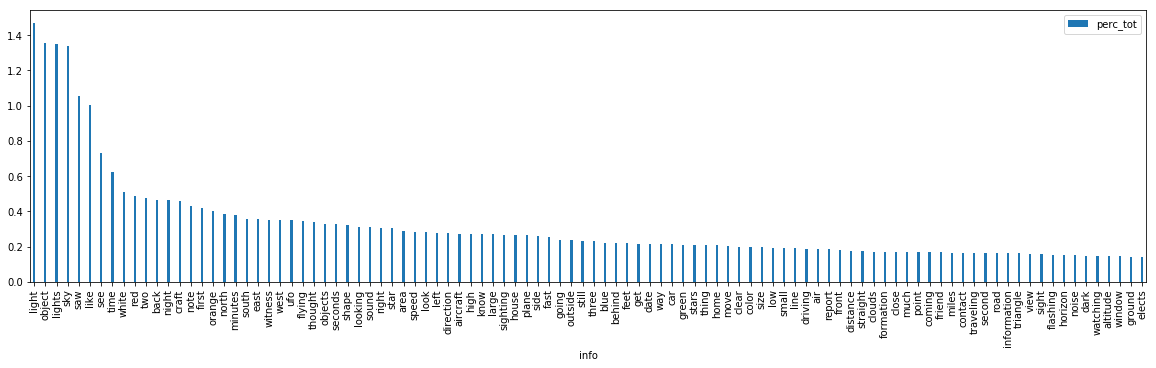

In [36]:
import matplotlib.pyplot as plt

ufo_nouns=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'noun']
ufo_nouns.reset_index(drop=True, inplace=True)
ufo_nouns.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

__bar plot of top 100 ufo verbs__

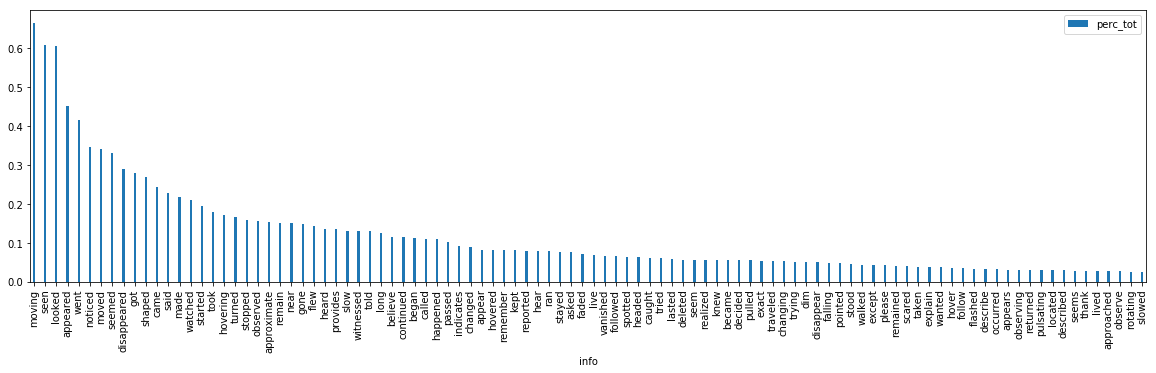

In [37]:
ufo_verbs=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'verb']
ufo_verbs.reset_index(drop=True, inplace=True)
ufo_verbs.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

__bar plot of top 100 ufo advs__

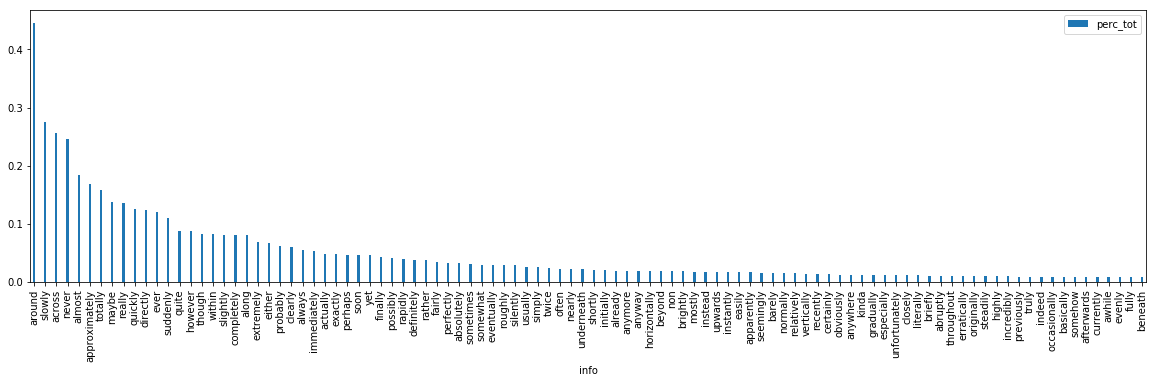

In [38]:
ufo_advs=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'adv']
ufo_advs.reset_index(drop=True, inplace=True)
ufo_advs.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

__bar plot of top 100 ufo adj__

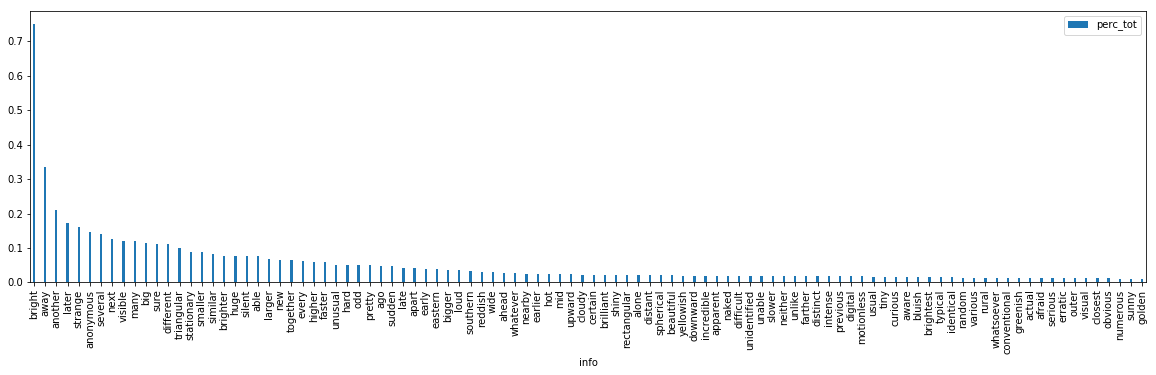

In [39]:
ufo_adjs=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'adj']
ufo_adjs.reset_index(drop=True, inplace=True)
ufo_adjs.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

## 4.6 The NLP analysis - Stemming

__Do now stemming__

In [40]:
import nltk

nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# creating PorterStemmer object to 
# take main stem of each word 
ps = PorterStemmer()  

stp_wrds_list = list(set(stopwords.words('english')))
ufo_summary_stats_word_type['stem_info']=ufo_summary_stats_word_type['info'].apply(lambda x: ps.stem(x) if x not in stp_wrds_list else '')
ufo_summary_stats_word_type.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,info,Cnt,perc_tot,prob,word_type,stem_info
0,light,145777,1.468411,0.014684,noun,light
1,object,134707,1.356903,0.013569,noun,object
2,lights,133911,1.348885,0.013489,noun,light
3,sky,133055,1.340263,0.013403,noun,sky
4,saw,104664,1.054280,0.010543,noun,saw
5,like,99474,1.002001,0.010020,noun,like
6,bright,74572,0.751164,0.007512,adj,bright
7,see,72555,0.730846,0.007308,noun,see
8,moving,66049,0.665311,0.006653,verb,move
9,time,61830,0.622813,0.006228,noun,time


In [41]:
ufo_stem_in = ufo_summary_stats_word_type[['stem_info','Cnt']]
ufo_stem_stats = ufo_stem_in.groupby(['stem_info']).sum()
#add percentage of total for Cnt
tot = ufo_stem_stats['Cnt'].sum()
print('total count=', tot)
ufo_stem_stats['perc_tot'] = 100*ufo_stem_stats['Cnt']/tot
ufo_stem_stats.sort_values(by="Cnt", ascending=False, inplace=True)
ufo_stem_stats.reset_index(drop=False, inplace=True)
ufo_stem_stats.rename(columns={'Cnt':'Stem_Cnt', 'perc_tot':'Stem_perc_tot'}, inplace=True)
ufo_stem_stats.head()

total count= 9471063


,stem_info,Stem_Cnt,Stem_perc_tot
0,light,283756,2.996031
1,object,167727,1.770942
2,sky,136233,1.438413
3,move,122453,1.292917
4,look,122128,1.289486


__bar plot of top 100 ufo stem words__

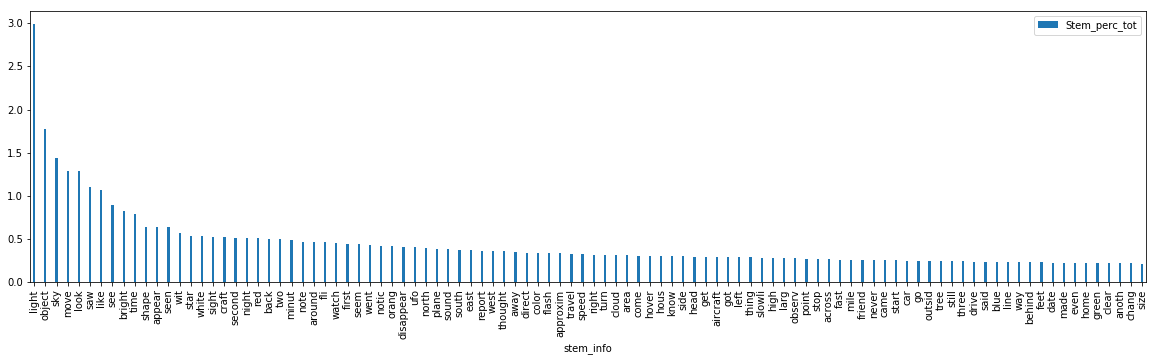

In [42]:
ufo_stem_stats.head(100).plot(kind='bar',x='stem_info',y='Stem_perc_tot', width=0.2, figsize=(20, 5))
plt.show()

__Word Cloud of top 50 stem ufo words__

In [44]:
!conda install -c conda-forge  wordcloud --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.6.0            |   py36h516909a_0         184 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    tk-8.6.10                  |       hed695b0_0         3.2 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    matplotlib-base-3.1.1      |   py36hfd891ef_0         6.7 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        12.4 MB

The following NEW packages will be INSTALLED:

    matplotlib-base: 3.1.1-py36hfd891ef_0 conda-forge
    wordcloud: 

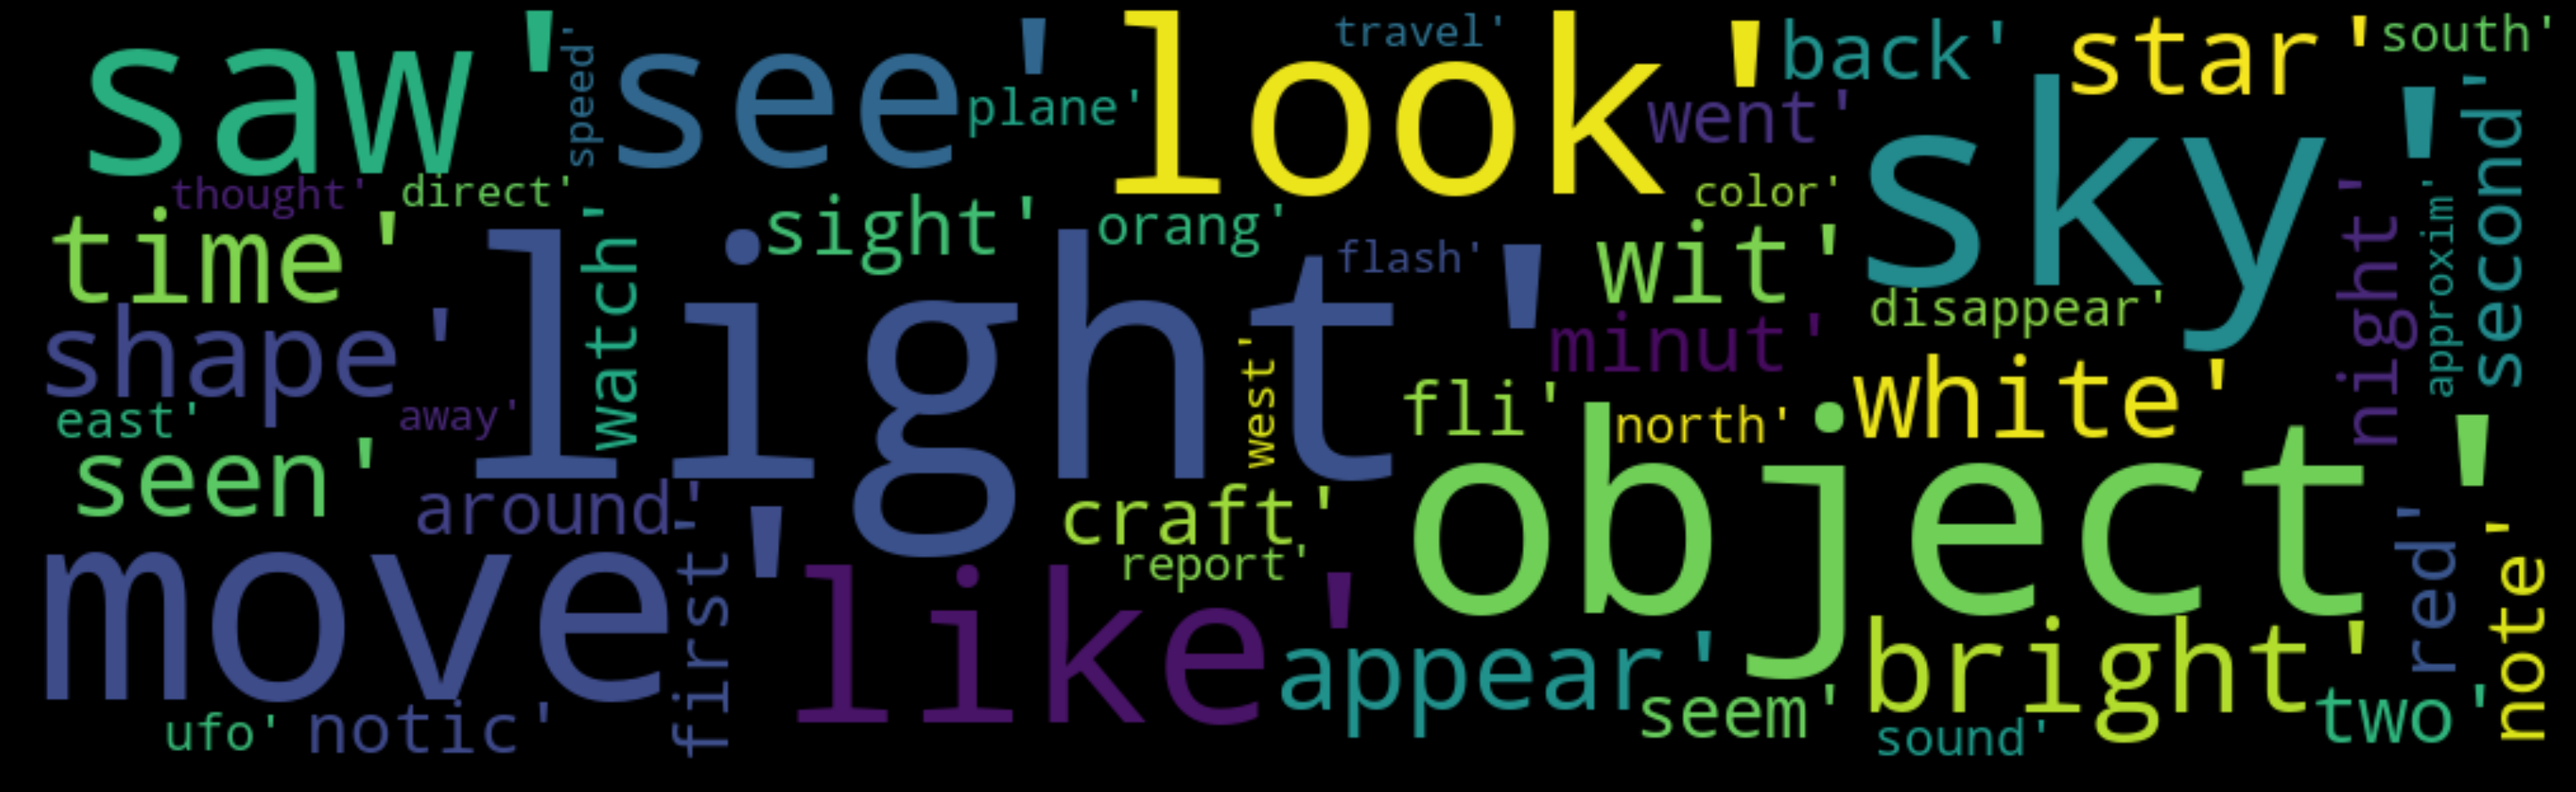

In [45]:
ufo_stem_top50_list = ufo_stem_stats.head(50)['stem_info'].tolist()

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ufo_stem_top50_list
wordcloud = WordCloud(
    #width = 3000,
    #height = 2000,
    width = 1000,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
for i in range(0, len(ufo_stem_top50_list)):
    print(ufo_stem_top50_list[i],end=' ')
    if (i > 0) & (i%10 == 0): print('\n')

light object sky move look saw like see bright time shape 

appear seen wit star white sight craft second night red 

back two minut note around fli watch first seem went 

notic orang disappear ufo north plane sound south east report 

west thought away direct color flash approxim travel speed 

In [47]:
ufo_summary_stats_word_type_stem_cnt = ufo_summary_stats_word_type.merge(ufo_stem_stats, on='stem_info')
ufo_stem_50 = ufo_summary_stats_word_type_stem_cnt[ufo_summary_stats_word_type_stem_cnt['stem_info'].apply(lambda x: x in ufo_stem_top50_list)]
ufo_stem_50.sort_values(by='Stem_Cnt', ascending=False, inplace=True)
ufo_stem_50.reset_index(drop=True, inplace=True)
ufo_stem_50

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,info,Cnt,perc_tot,prob,word_type,stem_info,Stem_Cnt,Stem_perc_tot
0,light,145777,1.468411,1.468411e-02,noun,light,283756,2.996031
1,lighting,2173,0.021889,2.188862e-04,noun,light,283756,2.996031
2,lighted,1895,0.019088,1.908833e-04,verb,light,283756,2.996031
3,lights,133911,1.348885,1.348885e-02,noun,light,283756,2.996031
4,object,134707,1.356903,1.356903e-02,noun,object,167727,1.770942
5,objects,32797,0.330364,3.303641e-03,noun,object,167727,1.770942
6,objective,210,0.002115,2.115330e-05,noun,object,167727,1.770942
7,objected,13,0.000131,1.309490e-06,verb,object,167727,1.770942
8,skies,3178,0.032012,3.201199e-04,noun,sky,136233,1.438413
9,sky,133055,1.340263,1.340263e-02,noun,sky,136233,1.438413


In order to gain understanding how these root words are used to describe the UFO phenomenon we did sample sentences from the sighting reports containing one or more of these words. This wasn’t anything fancy, we just limited our pool to the first 10000 reports and focused on the reports with the largest numbers of sentences in which these words appeared.

Here are the links for some of the reports:

<http://www.nuforc.org/webreports/010/S10250.html> (bright surrounding light,banging on car, animal life affected)  

<http://www.nuforc.org/webreports/011/S11956.html> (abduction to underground facility)  

<http://www.nuforc.org/webreports/011/S11676.html> (two bright objects perpendicular to one another)

<http://www.nuforc.org/webreports/014/S14868.html> (one bright object which turned into eleven)

<http://www.nuforc.org/webreports/011/S11868.html> (teardrop shape)

<http://www.nuforc.org/webreports/133/S133485.html> (changing shape)

<http://www.nuforc.org/webreports/132/S132745.html> (fluid formation flying disks)

<http://www.nuforc.org/webreports/133/S133288.html> (observed green star)

<http://www.nuforc.org/webreports/009/S09604.html> (craft floated and made no noise)

<http://www.nuforc.org/webreports/004/S04806.html> (5-8 smaller objects began to fall out of the larger object)

<http://www.nuforc.org/webreports/004/S04195.html> (if you look at it's lights it can affect you emotionally)

<http://www.nuforc.org/webreports/006/S06339.html> (light in the sky that changes color)

<http://www.nuforc.org/webreports/003/S03372.html> (memory gaps)

<http://www.nuforc.org/webreports/002/S02047.html> (drain the power from the battery of car)

<http://www.nuforc.org/webreports/003/S03291.html> (S-pattern)

http://www.nuforc.org/webreports/011/S11772.html (not from this world!)

http://www.nuforc.org/webreports/010/S10553.html (thousands report UFO in Papua New Guinea)

<http://www.nuforc.org/webreports/132/S132430.html> (glowing light that moved, stopped, glew brighter etc.)

<http://www.nuforc.org/webreports/007/S07673.html> (loop over each other)

<http://www.nuforc.org/webreports/008/S08795.html> (the light just sucked up in nothing and vanished)

<http://www.nuforc.org/webreports/004/S04967.html> (it hovered for a few seconds and then disappeared)

<http://www.nuforc.org/webreports/003/S03298.html> ("no plane I know can do this")

<http://www.nuforc.org/webreports/008/S08101.html> (the CD mysteriously played backwards!)

<http://www.nuforc.org/webreports/005/S05196.html> (zig zag)

<http://www.nuforc.org/webreports/005/S05813.html> (THERE WAS NO SOUND COMING FROM THIS OBJECT)

<http://www.nuforc.org/webreports/008/S08439.html> (flashing lights)

<http://www.nuforc.org/webreports/009/S09627.html> (intense UFO encounter sites)

<http://www.nuforc.org/webreports/011/S11867.html> (object travels at great speed, suddenly changes direction)

<http://www.nuforc.org/webreports/013/S13847.html> (extraordinary maneuverability and speed)

__Top UFO shapes__

In [48]:
ufo_shape_info=pd.DataFrame(explore_text_mining_info_df['shape'])
ufo_shape_info['Cnt']=1
ufo_shape_stats=ufo_shape_info.groupby('shape').sum()
ufo_shape_stats.sort_values(by='Cnt', ascending=False, inplace=True)
ufo_shape_stats.reset_index(drop=False, inplace=True)
ufo_shape_stats.head()

,shape,Cnt
0,light,22761
1,circle,11499
2,triangle,10488
3,fireball,8652
4,unknown,7879


In [49]:
#search_list = ['light']
#search_list = ['looked']
#search_list = ['bright']
#search_list = ['time', 'times']
#search_list = ['shape']
#search_list = ['appearing']
#search_list = ['witnessing']
#search_list = ['star']
#search_list = ['craft']
#search_list = ['seconds']
#search_list = ['night']
#search_list = ['red']
#search_list = ['backed']
#search_list = ['two']
#search_list = ['minute']
#search_list = ['noting']
#search_list = ['around']
#search_list = ['flying', 'flies']
#search_list = ['watched', 'watching']
#search_list = ['seems']
#search_list = ['noticing']
#search_list = ['disappeared']
#search_list = ['ufo','ufos']
#search_list = ['sounded','sound']
#search_list = ['thought','thoughts']
#search_list = ['colorful']
#search_list = ['flashing']
#search_list = ['approximately']
#search_list = ['travelling']
#search_list = ['speed']
search_list = ['saw']

ufo_item_ref=pd.DataFrame(explore_text_mining_info_df).head(10000)
ufo_item_ref['text_array']=ufo_item_ref["text"].str.split(".", n=0, expand=False)
ufo_item_ref['item_sentences']=ufo_item_ref['text_array'].apply(lambda x: [item for item in x if all(y in str(item).split(' ') for y in search_list)])
ufo_item_ref['num_of_item_sentences']=ufo_item_ref['item_sentences'].apply(lambda x: len(x))
ufo_item_ref.sort_values(by="num_of_item_sentences", ascending=False, inplace=True)
ufo_item_ref.reset_index(drop=False, inplace=True)
ufo_item_ref.head(3)

,index,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,text_array,item_sentences,num_of_item_sentences
0,166,"I am not sure if my original entry got sent, ...",Santa Ana,CA,2003-01-15T00:28:00,other,5 seconds,Occurred : 1/15/2003 00:28 (Entered as : 1/15...,http://www.nuforc.org/webreports/133/S133349.html,"I am not sure if my original entry got sent, h...",2017-04-07T00:00:00,33.741525,-117.86343,"i am not sure if my original entry got sent, h...",i am not sure if my original entry got sent he...,"[i, am, not, sure, if, my, original, entry, go...","[i, am, not, sure, if, my, original, entry, go...","[sure, original, entry, got, sent, duplicate, ...","[sure, original, entry, got, sent, duplicate, ...","[I am not sure if my original entry got sent, ...","[ One thing I forgot to mention, is I saw the...",16
1,7492,My husband and I saw an object hovering in the...,West Manchester,OH,1997-09-18T04:15:00,changing,1hr. 45min.,Occurred : 9/18/1997 04:15 (Entered as : 09/1...,http://www.nuforc.org/webreports/009/S09863.html,My husband and I saw an object hovering in the...,1999-10-02T00:00:00,39.894600,-84.61030,my husband and i saw an object hovering in the...,my husband and i saw an object hovering in the...,"[my, husband, and, i, saw, an, object, hoverin...","[my, husband, and, i, saw, an, object, hoverin...","[husband, saw, object, hovering, sky, north, h...","[husband, saw, object, hovering, sky, north, h...",[My husband and I saw an object hovering in th...,[My husband and I saw an object hovering in th...,14
2,8824,saw bright orange light making qiuck movements...,Signal Mountain,TN,1999-10-17T03:30:00,cigar,1 hour,Occurred : 10/17/1999 03:30 (Entered as : 10/...,http://www.nuforc.org/webreports/010/S10250.html,saw bright orange light making qiuck movements...,1999-10-19T00:00:00,35.204400,-85.32550,saw bright orange light making qiuck movements...,saw bright orange light making qiuck movements...,"[saw, bright, orange, light, making, qiuck, mo...","[saw, bright, orange, light, making, qiuck, mo...","[saw, bright, orange, light, making, qiuck, mo...","[saw, bright, orange, light, making, qiuck, mo...",[saw bright orange light making qiuck movement...,[saw bright orange light making qiuck movement...,13


In [50]:
#[light] http://www.nuforc.org/webreports/010/S10250.html 0
#[looked] http://www.nuforc.org/webreports/011/S11956.html (Abduction to underground facility.) 0
#[bright] http://www.nuforc.org/webreports/011/S11676.html 1
#[time, times] http://www.nuforc.org/webreports/014/S14868.html(one bright object which turned into eleven) 1
#[shape] http://www.nuforc.org/webreports/011/S11868.html (Teardrop shape) 1
#[appearing] http://www.nuforc.org/webreports/133/S133485.html (changing shape) 1
#[witnessing] http://www.nuforc.org/webreports/132/S132745.html (fluid formation flying disks) 1
#[star] http://www.nuforc.org/webreports/133/S133288.html (observed green star) 0
#[craft] http://www.nuforc.org/webreports/009/S09604.html (craft floated and made no noise) 2
#[seconds] http://www.nuforc.org/webreports/004/S04806.html (5-8 smaller objects began to fall out of the larger object) 0
#[night] http://www.nuforc.org/webreports/004/S04195.html (if you look at it's lights it can affect you emotionally) 0
#[red] http://www.nuforc.org/webreports/006/S06339.html (light in the sky that changes color) 2
#[backed] http://www.nuforc.org/webreports/003/S03372.html (memory gaps) 1
#[two] http://www.nuforc.org/webreports/002/S02047.html (drain the power from the battery of car, seems to hear what a person was thinking and entities can abduct the person) 0
#[minute] http://www.nuforc.org/webreports/003/S03291.html (S-pattern) 2
#[noting] http://www.nuforc.org/webreports/010/S10250.html (animal life affected) 0
#[around] http://www.nuforc.org/webreports/011/S11772.html (not from this world!) 1
#[flying, flies] http://www.nuforc.org/webreports/010/S10553.html (Thousands report UFO in Papua New Guinea) 0
#[watched, watching] http://www.nuforc.org/webreports/132/S132430.html (glowing light that moved, stopped, glew brighter and dimmed out) 1
#[seems] http://www.nuforc.org/webreports/007/S07673.html (loop over each other) 1
#[noticing] http://www.nuforc.org/webreports/008/S08795.html (Right before it would have hit plane, the light just sucked up in nothing and vanished.) 1
#[disappeared] http://www.nuforc.org/webreports/004/S04967.html (It hovered for a few seconds and then disappeared.) 2
#[ufo,ufos] http://www.nuforc.org/webreports/003/S03298.html (Then all of the sudden the middle ufo stop (like it had breaks) "no plane I know can do this" the other two ufos moved closer to the middle ufo) 0
#[sounded, sound] http://www.nuforc.org/webreports/008/S08101.html (CD players and radia had mysteriously played the CD backwards!) 2
#[thought,thoughts] http://www.nuforc.org/webreports/005/S05196.html (zig zag) 0
#[colorful] http://www.nuforc.org/webreports/005/S05813.html (THERE WAS NO SOUND COMING FROM THIS OBJECT) 0
#[flashing] http://www.nuforc.org/webreports/008/S08439.html (flashing lights) 2
#[approximately] http://www.nuforc.org/webreports/009/S09627.html (intense UFO encounter sites) 0
#[travelling] http://www.nuforc.org/webreports/011/S11867.html (travel at great speeds and suddenly change direction) 1
#[speed] http://www.nuforc.org/webreports/013/S13847.html (extraordinary maneuverability and speed) 0

ufo_item_ref['item_sentences'].iloc[0]

['  One thing I forgot to mention, is I saw the ufo in the unincorporated area of Santa Ana, zip code 92705, but, the ufo itself was in zip code 92707',
 ' I  saw a coyote in front of us, and I\'m about to say, "Coyote!" to my friends',
 '  I saw the 2 orbs surrounded by lasers, the smaller orbs shadow on the runway, then looked in the hills in Irvine behind it, which was around the Turtle Rock Neighborhood (I know this because ironically enough, one of the passengers in my car lived in that neighborhood at the time)  It was so bright, it lit up EVERYTHING IN THE ENTIRE HORIZON',
 '  It was beautiful-I glance up and at last moment, and saw the Island of Catalina, and again, the flash was was so bright I saw the green from the grass in the hills and the brown from the earth in Catalina',
 ' I pull in front of my house, all of us are stunned, and my buddy in the back says, "Please tell me you guys just saw that!" and we all freak out, and everyone shares everything they saw',
 ' ONE frie

__Abduction__

In [51]:
search_list = ['abduction']

ufo_item_ref=pd.DataFrame(explore_text_mining_info_df[~explore_text_mining_info_df['text'].isnull()])
ufo_item_ref['text_array']=ufo_item_ref["text"].str.split(".", n=0, expand=False)
ufo_item_ref['item_sentences']=ufo_item_ref['text_array'].apply(lambda x: [item for item in x if all(y in str(item).split(' ') for y in search_list)])
ufo_item_ref['num_of_item_sentences']=ufo_item_ref['item_sentences'].apply(lambda x: len(x))
ufo_item_ref.sort_values(by="num_of_item_sentences", ascending=False, inplace=True)
ufo_item_ref.reset_index(drop=False, inplace=True)

abduction_mention_cases=ufo_item_ref[ufo_item_ref['num_of_item_sentences'] > 0] #abduction cases
abduction_mention_cases.shape

(231, 22)

__Hoax__

In [52]:
search_list = ['hoax']

ufo_item_ref=pd.DataFrame(explore_text_mining_info_df[~explore_text_mining_info_df['text'].isnull()])
ufo_item_ref['text_array']=ufo_item_ref["text"].str.split(".", n=0, expand=False)
ufo_item_ref['item_sentences']=ufo_item_ref['text_array'].apply(lambda x: [item for item in x if all(y in str(item).split(' ') for y in search_list)])
ufo_item_ref['num_of_item_sentences']=ufo_item_ref['item_sentences'].apply(lambda x: len(x))
ufo_item_ref.sort_values(by="num_of_item_sentences", ascending=False, inplace=True)
ufo_item_ref.reset_index(drop=False, inplace=True)

hoax_mention_cases=ufo_item_ref[ufo_item_ref['num_of_item_sentences'] > 0] #abduction cases
hoax_mention_cases.shape

(649, 22)

## 4.7 The information entropy

__create dictionary of words with respective probabilities__

In [53]:
ufo_dict_in = ufo_summary_stats_word_type[['info','prob']]
ufo_words_dict = dict(ufo_dict_in.values.tolist())
len(ufo_words_dict)

6932

__look up words in mining_info2 in the above dictionary in create a list of respective proabilities__

In [54]:
explore_text_mining_info_df['score']=explore_text_mining_info_df['mining_info2'].apply(lambda x: [ufo_words_dict[item] for item in x if item in ufo_words_dict.keys()])
explore_text_mining_info_df.head(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,score
0,"Three saucer shaped ships. High in the sky, m...",Salem,OR,NaN,disk,15 minutes,Occurred : 8/15/1950 14:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/135/S135871.html,"Three saucer shaped ships. High in the sky, m...",NaN,44.941247,-123.004235,"three saucer shaped ships. high in the sky, m...",three saucer shaped ships high in the sky meta...,"[three, saucer, shaped, ships, high, in, the, ...","[three, saucer, shaped, ships, high, in, the, ...","[three, saucer, shaped, ships, high, sky, meta...","[three, saucer, shaped, ships, high, sky, meta...","[0.002327466920022713, 0.0004933754424942113, ..."
1,Tear-drop shaped silent craft with sectional f...,Ellsworth,ME,NaN,teardrop,5 minutes,Occurred : 8/15/1967 21:30 (Entered as : 08/0...,http://www.nuforc.org/webreports/132/S132451.html,Tear-drop shaped silent craft with sectional f...,NaN,44.651300,-68.450700,tear-drop shaped silent craft with sectional f...,tear drop shaped silent craft with sectional f...,"[tear, drop, shaped, silent, craft, with, sect...","[tear, drop, shaped, silent, craft, with, sect...","[tear, drop, shaped, silent, craft, sectional,...","[tear, drop, shaped, silent, craft, sectional,...","[4.119856185792822e-05, 0.00014666285101502075..."


__calculate respective entropy and add length of the report__

In [55]:
explore_text_mining_info_df['entropy']=explore_text_mining_info_df['score'].apply(lambda x: sum([-item*np.log2(item) for item in x if item > 0]))
explore_text_mining_info_df['text_len']=explore_text_mining_info_df['text'].apply(lambda x: len(str(x)))
explore_text_mining_info_df.head(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,score,entropy,text_len
0,"Three saucer shaped ships. High in the sky, m...",Salem,OR,NaN,disk,15 minutes,Occurred : 8/15/1950 14:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/135/S135871.html,"Three saucer shaped ships. High in the sky, m...",NaN,44.941247,-123.004235,"three saucer shaped ships. high in the sky, m...",three saucer shaped ships high in the sky meta...,"[three, saucer, shaped, ships, high, in, the, ...","[three, saucer, shaped, ships, high, in, the, ...","[three, saucer, shaped, ships, high, sky, meta...","[three, saucer, shaped, ships, high, sky, meta...","[0.002327466920022713, 0.0004933754424942113, ...",0.461675,276
1,Tear-drop shaped silent craft with sectional f...,Ellsworth,ME,NaN,teardrop,5 minutes,Occurred : 8/15/1967 21:30 (Entered as : 08/0...,http://www.nuforc.org/webreports/132/S132451.html,Tear-drop shaped silent craft with sectional f...,NaN,44.651300,-68.450700,tear-drop shaped silent craft with sectional f...,tear drop shaped silent craft with sectional f...,"[tear, drop, shaped, silent, craft, with, sect...","[tear, drop, shaped, silent, craft, with, sect...","[tear, drop, shaped, silent, craft, sectional,...","[tear, drop, shaped, silent, craft, sectional,...","[4.119856185792822e-05, 0.00014666285101502075...",0.980491,872


__sort by entropy in descending order__

In [56]:
explore_text_mining_info_df.sort_values(by="entropy", ascending=False, inplace=True)
explore_text_mining_info_df.reset_index(drop=True, inplace=True)
explore_text_mining_info_df.head(6)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,score,entropy,text_len
0,[Diary of my EncountersThis is the story I hav...,NaN,NaN,1997-05-27T11:33:00,rectangle,NaN,Occurred : 5/27/1997 11:33 Reported: 3/3/1997 ...,http://www.nuforc.org/webreports/002/S02047.html,[Diary of my Encounters This is the story I ha...,1998-03-07T00:00:00,NaN,NaN,[diary of my encounters this is the story i ha...,diary of my encounters this is the story i ha...,"[, diary, of, my, encounters, this, is, the, s...","[, diary, of, my, encounters, this, is, the, s...","[, diary, encounters, story, known, since, hol...","[diary, encounters, story, known, since, holid...","[4.1097831877835486e-05, 0.0004282031453742124...",31.315273,23914
1,Moon like UFO hovers for minutes then ascends ...,Memphis,TN,NaN,circle,15 mins,Occurred : 11/22/1964 22:00 (Entered as : 11/...,http://www.nuforc.org/webreports/086/S86119.html,Moon like UFO hovers for minutes then ascends ...,NaN,35.125473,-89.926925,moon like ufo hovers for minutes then ascends ...,moon like ufo hovers for minutes then ascends ...,"[moon, like, ufo, hovers, for, minutes, then, ...","[moon, like, ufo, hovers, for, minutes, then, ...","[moon, like, ufo, hovers, minutes, ascends, ap...","[moon, like, ufo, hovers, minutes, ascends, ap...","[0.0013654956101371025, 0.010020014039744625, ...",30.012284,64658
2,Close encounter 5th kind - CE5.,Okeechobee,FL,1994-10-12T21:00:00,disk,unknown,Occurred : 10/12/1994 21:00 (Entered as : 10/...,http://www.nuforc.org/webreports/117/S117952.html,Close encounter 5th kind - CE5. This is a comp...,2015-03-26T00:00:00,27.252880,-81.007433,close encounter th kind - ce. this is a comple...,close encounter th kind ce this is a completel...,"[close, encounter, th, kind, ce, this, is, a, ...","[close, encounter, th, kind, ce, this, is, a, ...","[close, encounter, th, kind, ce, completely, t...","[close, encounter, kind, completely, true, ama...","[0.0017121074716362004, 0.00016167161804883813...",28.399367,29005
3,Before I go into any detail about our experien...,Vale,OR,2009-08-19T22:00:00,triangle,30 minutes,Occurred : 8/19/2009 22:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/072/S72574.html,Before I go into any detail about our experien...,2009-12-12T00:00:00,44.038700,-117.382400,before i go into any detail about our experien...,before i go into any detail about our experien...,"[before, i, go, into, any, detail, about, our,...","[before, i, go, into, any, detail, about, our,...","[go, detail, experience, would, like, preface,...","[detail, experience, would, like, preface, acc...","[0.00016167161804883813, 0.0004621491486654637...",23.774697,23917
4,"Lighted craft hovered for 3-minutes, then dove...",Dallas,TX,2014-06-13T23:00:00,triangle,"3-minutes, 5-seconds",Occurred : 6/13/2014 23:00 (Entered as : 06/1...,http://www.nuforc.org/webreports/116/S116501.html,"Lighted craft hovered for 3-minutes, then dove...",2015-01-07T00:00:00,32.835168,-96.808118,"lighted craft hovered for -minutes, then dove ...",lighted craft hovered for minutes then dove mi...,"[lighted, craft, hovered, for, minutes, then, ...","[lighted, craft, hovered, for, minutes, then, ...","[lighted, craft, hovered, minutes, dove, mile,...","[lighted, craft, hovered, minutes, dove, mile,...","[0.000190883312275731, 0.004597215561452288, 0...",23.431015,24509
5,Saw 3 objects in sky and a creature.,Charlotte,NC,2014-05-05T20:35:00,changing,4 hours,Occurred : 5/5/2014 20:35 (Entered as : 05/05...,http://www.nuforc.org/webreports/109/S109660.html,Saw 3 objects in sky and a creature. UFO sight...,2014-06-04T00:00:00,35.205801,-80.826392,saw objects in sky and a creature. ufo sighti...,saw objects in sky and a creature ufo sighting...,"[saw, objects, in, sky, and, a, creature, ufo,...","[saw, objects, in, sky

__summary for top 6 reports__

In [57]:
explore_text_mining_info_df['summary'].iloc[0]

'[Diary of my EncountersThis is the story I have known since 1979In 1979 I was holidaying at a place called Berowra waters on the South '

In [58]:
explore_text_mining_info_df['summary'].iloc[1]

'Moon like UFO hovers for minutes then ascends to appear to look like bright star, then dim star, then gone.'

In [59]:
explore_text_mining_info_df['summary'].iloc[2]

'Close encounter 5th kind - CE5.'

In [60]:
explore_text_mining_info_df['summary'].iloc[3]

'Before I go into any detail about our experience, I would like to preface this account with a description of the area we were in.'

In [61]:
explore_text_mining_info_df['summary'].iloc[4]

'Lighted craft hovered for 3-minutes, then dove 1-mile in 5-seconds'

In [62]:
explore_text_mining_info_df['summary'].iloc[5]

'Saw 3 objects in sky and a creature.'

__interestingly the lowest entropy reports are mostly in Spanish!__

In [63]:
explore_text_mining_info_df['text'].iloc[112093]

'tres circulos se dirijian al cerro catedral'

In [64]:
explore_text_mining_info_df['text'].iloc[112092]

'isawabluestarmovingslowwthadstrobelightarounditthenitstopinthemiddleofthesky2seconsmovewestthenlightsoffbutthestrobekeptflashngmanycolorsthenitmovefromwest2eastin4seconds'

In [65]:
explore_text_mining_info_df['text'].iloc[112091]

'luces de variados colores en continuos cambios parpadeantes'

In [66]:
explore_text_mining_info_df['text'].iloc[112090]

'el unico objeto era un punto de luz blanco en una noche despejada del tamaño de una estrella grande, luego de estar suspendida por un corto periodo desendio en forma de escalera muy precisa y de golpe acendio perdiendose en el cielo muy rapidamente.'

## Results and Discussion <a name="results"></a>

## Results

Bar plots below give us a visual sense of the most frequent nouns, verbs, adjectives and adverbs used to describe the UFO phenomenon for the 100 most frequent entries for each of these 4 word classes.

## nouns

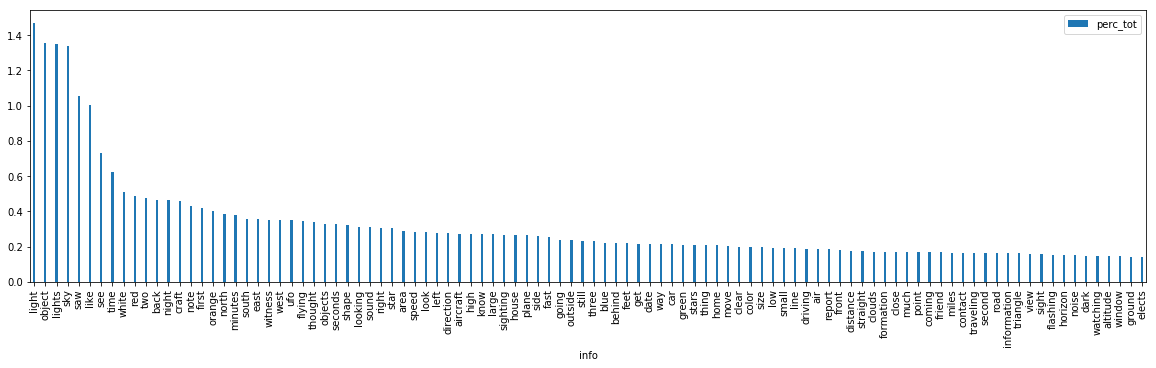

In [98]:
import matplotlib.pyplot as plt

ufo_nouns=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'noun']
ufo_nouns.reset_index(drop=True, inplace=True)
ufo_nouns.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

Clearly, ‘light’, ‘object’, ‘lights’, and ‘sky’ are leading nouns. It is interesting ‘saw’ and ‘see’ are classified by WordNet as nouns although we would expect for ‘see’ to be a verb and for ‘saw’ to be past tense of see.

## verbs

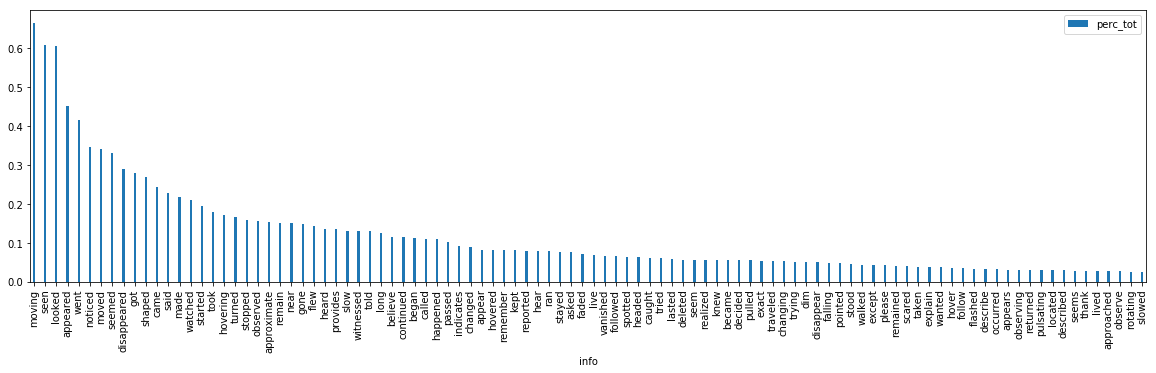

In [99]:
ufo_verbs=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'verb']
ufo_verbs.reset_index(drop=True, inplace=True)
ufo_verbs.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

The leading verbs are ‘moving’, ‘seen’, and ‘looked’.

## adverbs

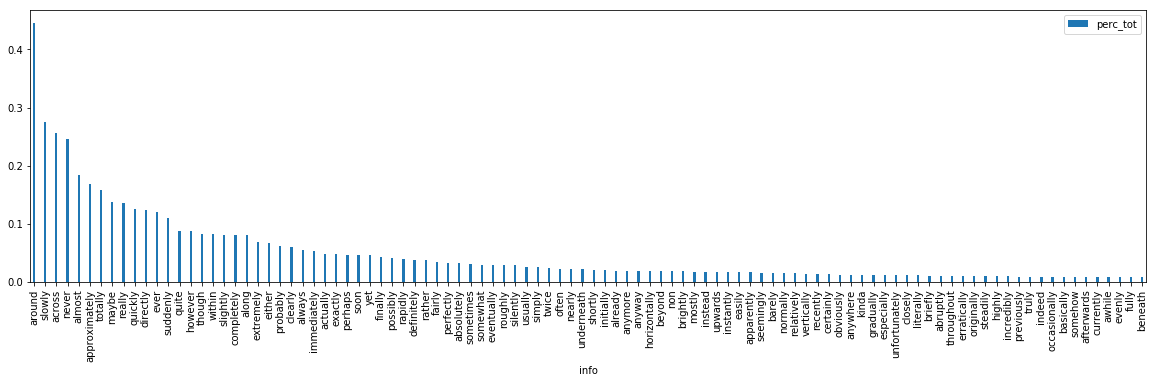

In [100]:
ufo_advs=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'adv']
ufo_advs.reset_index(drop=True, inplace=True)
ufo_advs.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

‘around’ is the top adverb while ‘bright’ is the top adjective.

## adjectives

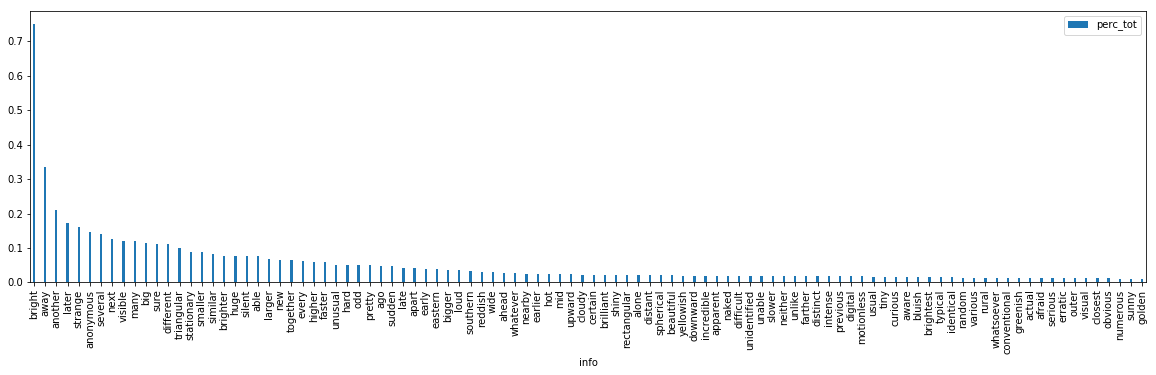

In [101]:
ufo_adjs=ufo_summary_stats_word_type[ufo_summary_stats_word_type['word_type'] == 'adj']
ufo_adjs.reset_index(drop=True, inplace=True)
ufo_adjs.head(100).plot(kind='bar',x='info',y='perc_tot', width=0.2, figsize=(20, 5))
plt.show()

To make it easy to spot frequencies of the top 50 stem words used to describe the UFO phenomenon we created a Word Cloud.

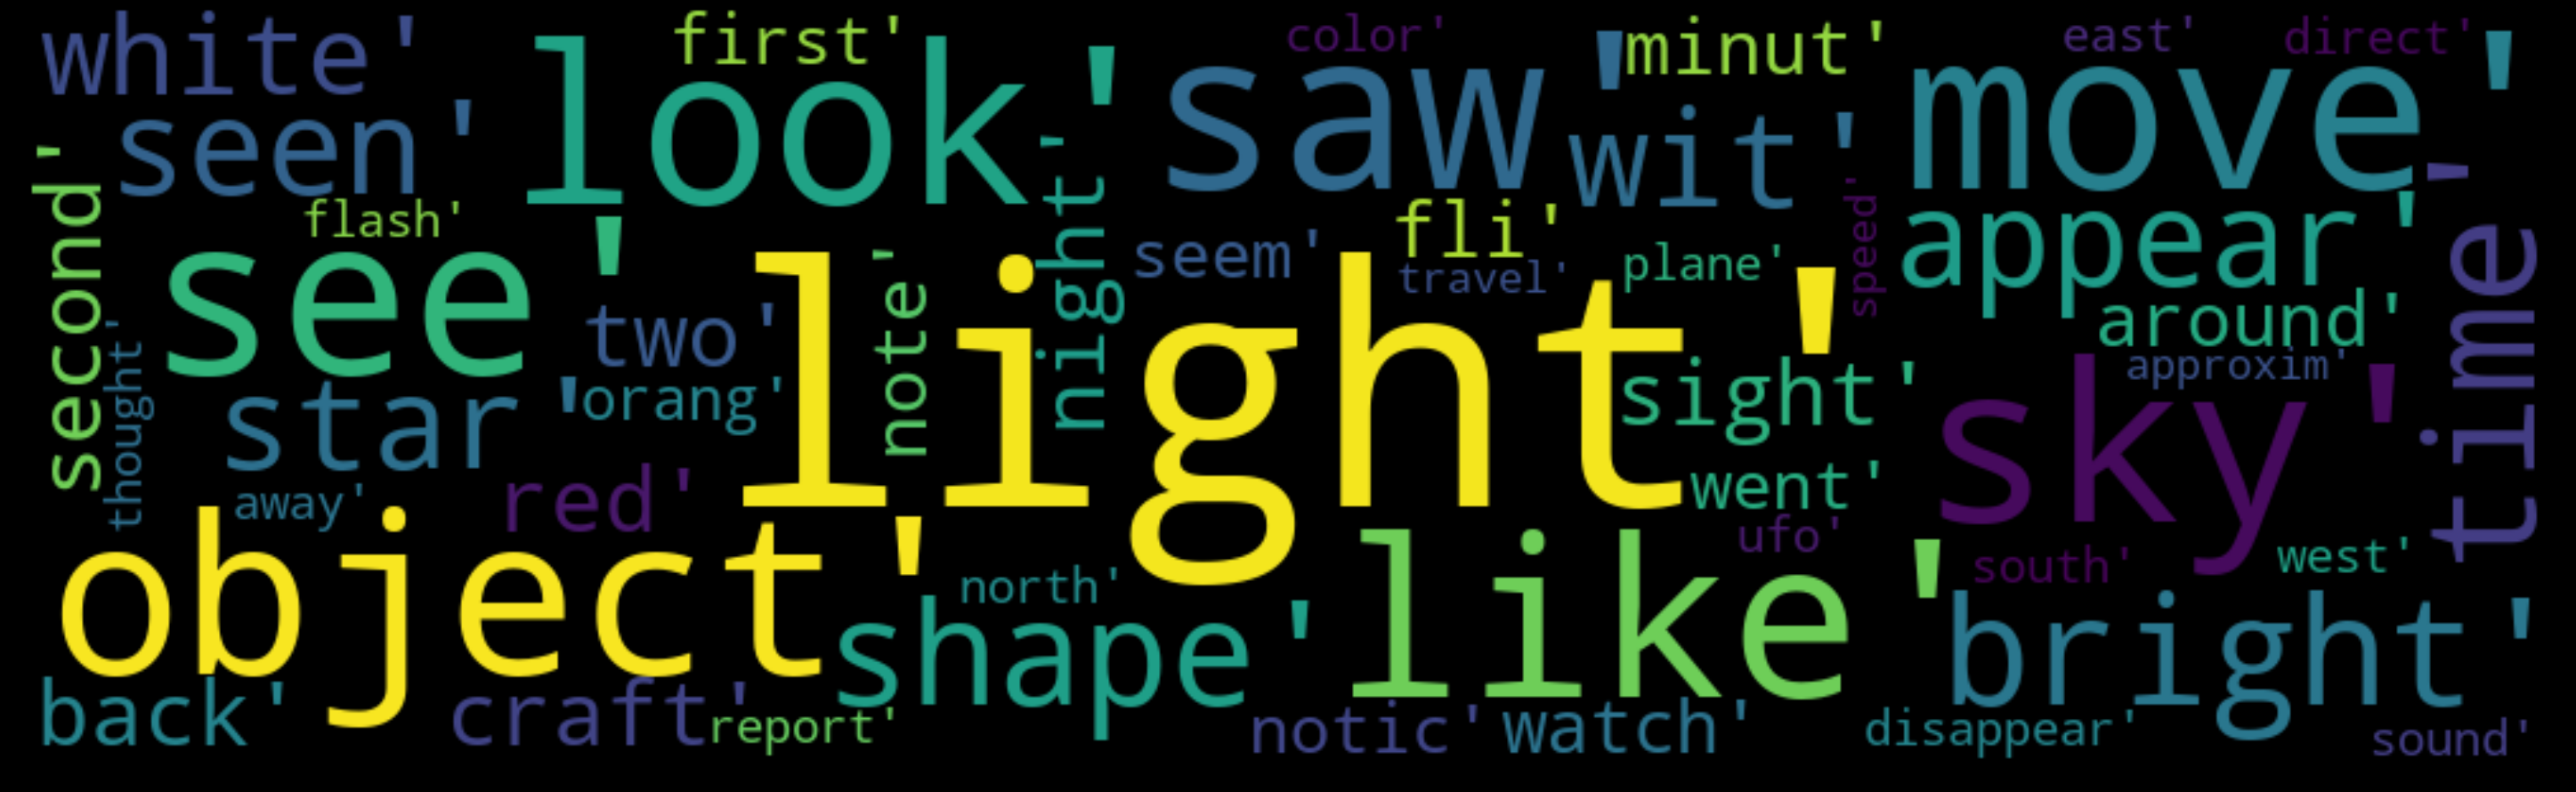

In [102]:
ufo_stem_top50_list = ufo_stem_stats.head(50)['stem_info'].tolist()

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ufo_stem_top50_list
wordcloud = WordCloud(
    #width = 3000,
    #height = 2000,
    width = 1000,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

These are fascinating fragments of the story the UFO observational data is telling about the UFO phenomenon:  

It is about a moving, bright object or objects in the sky with distinct light features, extraordinary, unusual, flying characteristics, power to affect nearby things or living beings and some noticeable, sometimes, changing shape.    
  
The object can look like a colorful light in the sky that changes color, for example, from red to green to yellow, the light can be flashing or the light that disappears or the object looks like a moving star. For example, "glowing light that moved, stopped, glowed brighter and dimmed out" or "right before it would have hit plane, the light just sucked up in nothing and vanished".    
  
It seems if you look at the object’s lights it can affect you emotionally!    
  
These objects can hover and disappear, move erratically, like zig zag, can float and make absolutely no noise or sound.      
  
The object can be a silent airborne object and can come to a complete, sudden stop and smaller objects can fall out of the object.    
  
These objects can fly in a perfect formation like a perfect line or in a strange formation, for example S-shaped pattern, can loop over each other and display extraordinary maneuverability and speed and can suddenly change direction.    
  
It looks the object can somehow affect the memory of a person looking at it, causing memory gaps!    
  
Besides causing electrical failures in the car, wipers beating windshields, etc. the object can affect animal life as well.    
  
It looks when these objects are around, CD players and radios can mysteriously play the CD backwards!    
  
The objects can drain the power from the battery of car, seems to hear what a person was thinking and entities can abduct the person.    
  
The most frequent 5 shapes for these objects are light, circle, triangle, fireball or unknown.    
  
Sometimes many people witness these objects (see Thousands report UFO in Papua New Guinea) and some areas are intense UFO encounter sites.    
  
These things look not from this world!  

These are the links for the top 6 sighting reports based on the information entropy that we listed in 4.7 section:

1.  <http://www.nuforc.org/webreports/002/S02047.html>

2.  <http://www.nuforc.org/webreports/086/S86119.html>

3.  <http://www.nuforc.org/webreports/117/S117952.html>

4.  <http://www.nuforc.org/webreports/072/S72574.html>

5.  <http://www.nuforc.org/webreports/116/S116501.html>

6.  <http://www.nuforc.org/webreports/109/S109660.html>


The third report is about a Close Encounter of the Fifth Kind which Wikipedia defines as “a UFO event that involves direct communication between aliens and humans” [6].

[6]. <https://en.wikipedia.org/wiki/Close_encounter#Close_Encounters_of_the_Fifth_Kind>

 
Some captivating parts of that report:

The disk was still flying toward us, slowly, maybe 20-mph. It flew the same way over the canal until about 300-yards away. Then it went gradually higher to about 400-yards, almost over head. It’s changing direction slightly now, moving to the opposite edge of the canal and over a point about 100-yards in front of us. It slowed, descending as it went by. It’s absurd not being aware that it’s a UFO but it never entered my mind. A UFO is exactly what we saw, the real thing. I never saw one before and this one is really close. It didn’t get closer than 200-yards to where we stood. As the craft flew by, it was perfectly circular, about 35-feet in diameter give or take five. At that height it looks bigger than, say, a full moon rising on the horizon and it’s brighter. As it moved it made a bright white glow with a hint of yellow, bright but without a strain... easy on the eyes....  
  
Here’s what happened. We watched as the craft came lower, stopped, and became darker. Two small lights appeared. The craft was parked in the air just inside the levee of Big Lake maybe as close as 200-yards away. As we watched, something hit me, a marvelously happy feeling and I knew at the time it was coming from the craft. I thought THIS is a really good sign whoever they are....  
  
The happiest feeling of anticipation had suddenly come upon me. I knew to expect something wonderful to happen between them and me. They were doing something to affect my mental state giving me a wonderful feeling of euphoria. It‘s nothing like anything I’ve ever felt, a totally joyful happy feeling beyond description. I was so glad they were here and understood, waiting for something. I dared not move a muscle although knew I wasn’t restrained. Whatever came next I wanted to be part of it. Next, I was sensing a projection of thought to me, when soon thought-speech appeared in mind in my own idiom....

The most bizarre part of the 6th report is a description of a possible extraterrestrial biological entity:  

Once back on the interstate I drove for quite some time when finally I just had to pull off. By this time it was after midnight. I took a well lit exit and saw a Wendy’s but it was only open for drive through. All of the gas stations were closed. All the while I’m checking the skies. So, I got back on I-77 and looked for another exit. That’s when I saw a Shell station sign and took that exit. It was on the left side so we had to go over the overpass. We could tell it was closed as soon as we came over the overpass. All of the parking lot lights were on but it was closed. I was in pain because my bladder was hurting now. I pulled partially into the entrance of the Shell station and then made a u turn. As I completed the u turn we saw a guard rail right in front of us.   
  
At the very end of the guard rail as we were swinging around we saw something standing there. I couldn’t take my eyes off of it. It was right next to the road. Right next to the door of the car. It seemed to be! bristling. Like it was luminescent in some way, but it was really darkly colored like it was camouflaged. I actually thought it was someone dressed up in that camouflage netting stuff when it moved towards the glass right next to my daughter. She put her hands and arms up over her face and head and tucked her head downwards. That is how close that thing was to her door. I honestly thought it may have been a poacher until I could make out the shape of it. I could see a larger than normal rounded top of a head then it came down to a short little neck area then straight out to both sides to shoulders. (Human shoulders aren’t shaped that way.) Then it’s arms dropped straight down. The thing that made me realize that it wasn’t human was mostly that it’s waist was only like 8 inches wide and that it was about maybe 4 feet tall. I could see from the top of it’s head to its hip area through her window. I remember thinking “It’s so skinny!” Next thing I know we are past it and my daughter is asking me, “Was that a person?” I remember looking back over my right shoulder through the window behind her and still seeing the thing. It was moving and I had never been so terrified in my entire life.   
  
My daughter said that she didn’t look at it but then moments later she said that it was really thin. I remember asking her how do you know that if you didn’t look at it? She still can’t answer that question, but is adamant about not looking at it.


Besides a possible abduction in both cases, what is so striking about the 6th report is that points to a possible occurrence of missing time:  

Strange thing is that the clock on her cell and the register receipt didn’t match. The receipt said we left there at 10:05 and my daughter had gotten a call from her husband while we were at the table and the time read 10:46. That would mean that by her cell we left there after 11:00 PM. I know we weren’t sitting there for that long. I called the Denny’s last week and spoke to a manager to see if the register’s time was off. But, it was accurate. I can’t explain the difference.

## Discussion

In his book [7] Allen Hynek established **beyond reasonable doubt** that UFO cases are not **all** misperceptions or hoaxes. Publicly available datasets about the UFO observations allow us to explore freely the sighting reports not for the sake of their story value, but for the insights what people have actually experienced that witnessed these things. Our problem was to reveal a story the UFO observational data is telling about the UFO phenomenon. We combined two ingredients, a free available UFO dataset and data science to unlock insights about the UFO phenomenon. In other words, we did focus on the narrative derived from the data and analysis based on the Natural language processing, stemming and calculation of the information entropy. Essentially we did build a list of words used to describe the UFO phenomenon along with their respective frequencies and we did focus on the 50 most frequent stem words. Using the information entropy to quantify how much information there is in each sighting report and looking at the top sighting reports in the information entropy we did reveal some aspects of the UFO phenomenon, for example abduction and occurrence of missing time, that were not captured by the 50 most frequent stem words. For example, stem words related to abduction and occurrence of missing time are abduct and clock and they are on 1239th and 559th place respectively in the list of the stem words.

Due to the dying kernel, with our simple divide and conquer strategy to avoid the kernel death, we were only able to keep words with percentages greater than 0.001 percent in the list (see the section 4.3 for details). This means after all 10 splits were processed we were able to include only about 17% of all words in the list.

This means that we were able to uncover only fragments of the story, but even these fragments will definitely capture the imagination of readers. To capture the full story the UFO observational data is telling about the UFO phenomenon additional methodology and analysis is needed to process all words, for example MapReduce approach in which the work is divided into smaller parts. Each part is processed independently in parallel on the cluster of servers to get individual outputs. These outputs are further processed to get the final output. Building a complete list of words used to describe the UFO phenomenon along with their respective frequencies is the word count MapReduce problem that can be easily solved in the MapReduce framework ([word count](https://riptutorial.com/hadoop/example/13413/word-count-program-in-java---python-)). Our gut feeling is that we should not expect significant changes in what we uncovered so far by including low frequency words (0.001 percent or less) in the list.

Even with the fragmentary information extracted by our approach we can see that the full story is going to be incredible, about things that look not from our everyday world. The story will be about moving, bright object or objects in the sky with distinct light features like a colorful light in the sky that changes color or like the light that just sucked up in nothing and vanished.

Their flying characteristics are unusual, extraordinary. These objects can hover and disappear, move erratically, like zig zag, can float and make absolutely no noise or sound. For example, the object can come to a complete, sudden stop and smaller objects can fall out of the object. Or the objects can fly in a perfect formation like a perfect line or in a strange formation, like S-shaped pattern, can loop over each other and display extraordinary maneuverability and speed and can suddenly change direction.

The objects have power to affect nearby things or living beings. For example, it seems if you look at the object’s lights it can affect you emotionally! Or it looks the object can somehow affect the memory of a person looking at it, causing memory gaps! They can affect animal life as well and drain the power from the battery of car, cause wipers beating windshields and it seems they can hear what a person was thinking. It looks when these objects are around, CD players and radios can mysteriously play the CD backwards and they can cause occurrence of missing time! Finally, entities in these objects can abduct the person.

 

[7]. Hynek, Allen J. (1998) [First published 1972]. *The UFO Experience: A Scientific Inquiry*. Da Capo Press. [ISBN](https://en.wikipedia.org/wiki/International_Standard_Book_Number) [978-1-56924-782-2](https://en.wikipedia.org/wiki/Special:BookSources/978-1-56924-782-2).

## Conclusion <a name="conclusion"></a>

The purpose of this project was to attempt to reveal the story the UFO observational data is telling about the UFO phenomenon. This story would capture the insights what people have actually experienced that witnessed these things. We did show that focusing on the narrative derived from the UFO observational data and analysis based on the Natural language processing, stemming and calculation of the information entropy we were able to uncover fascinating fragments of the story. Information extracted by our approach so far points to the story about things that look not from our everyday world. Future directions include researching how to incorporate additional methodology and analysis, for example MapReduce, to capture the full story the UFO observational data is telling about the UFO phenomenon.

# Exploration section

__entropy stats: The overwheling majority of the UFO reports are in (0.0, 1.0] and (1.0, 2.0] entropy buckets__

In [67]:
explore_text_mining_info_df['entropy'].describe()

count    112094.000000
mean          1.592075
std           1.241710
min           0.000000
25%           0.816331
50%           1.296912
75%           1.993496
max          31.315273
Name: entropy, dtype: float64

In [68]:
custom_bucket_array = np.linspace(0, 32, 33)
#custom_bucket_array = np.linspace(0, 40, 11)
#custom_bucket_array
entropy_disp = pd.DataFrame(pd.cut(explore_text_mining_info_df['entropy'], bins=custom_bucket_array).value_counts())
entropy_disp.reset_index(drop=False, inplace=True)
entropy_disp.rename(columns={'index':'bins', 'entropy':'entropy_counts'}, inplace=True)
entropy_disp

,bins,entropy_counts
0,"(1.0, 2.0]",45208
1,"(0.0, 1.0]",39058
2,"(2.0, 3.0]",16931
3,"(3.0, 4.0]",6030
4,"(4.0, 5.0]",2510
5,"(5.0, 6.0]",1173
6,"(6.0, 7.0]",517
7,"(7.0, 8.0]",278
8,"(8.0, 9.0]",143
9,"(9.0, 10.0]",78


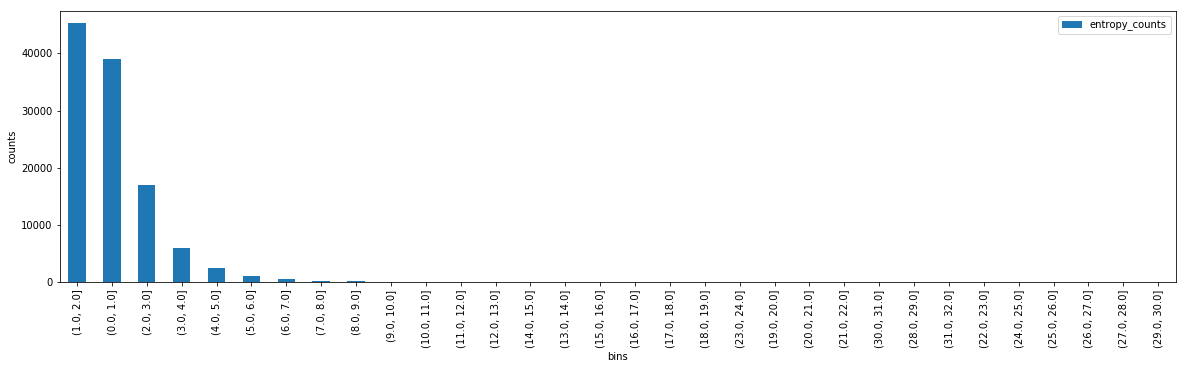

In [69]:
import matplotlib.pyplot as plt

entropy_disp.plot(kind='bar', x='bins', y='entropy_counts', figsize=(20, 5))
plt.ylabel('counts')
plt.show()

__plot when 0-4 and 4-8 buckets are removed__

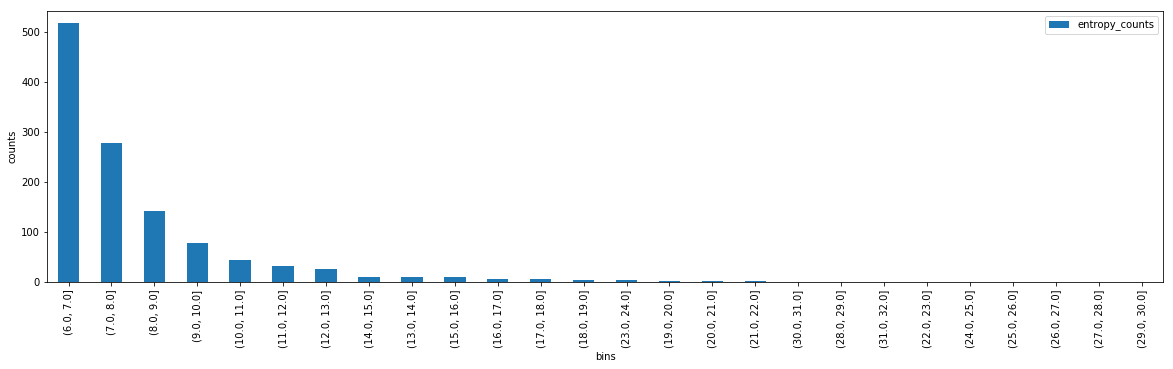

In [70]:
entropy_disp[entropy_disp['entropy_counts'] < 800].plot(kind='bar', x='bins', y='entropy_counts', figsize=(20, 5))
plt.ylabel('counts')
plt.show()

__add bins back to explore_text_mining_info_df__

In [71]:
explore_text_mining_info_df['bins']=pd.DataFrame(pd.cut(explore_text_mining_info_df['entropy'], bins=custom_bucket_array))
explore_text_mining_info_df.bins = explore_text_mining_info_df.bins.astype(str)
explore_text_mining_info_df.head(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,score,entropy,text_len,bins
0,[Diary of my EncountersThis is the story I hav...,NaN,NaN,1997-05-27T11:33:00,rectangle,NaN,Occurred : 5/27/1997 11:33 Reported: 3/3/1997 ...,http://www.nuforc.org/webreports/002/S02047.html,[Diary of my Encounters This is the story I ha...,1998-03-07T00:00:00,NaN,NaN,[diary of my encounters this is the story i ha...,diary of my encounters this is the story i ha...,"[, diary, of, my, encounters, this, is, the, s...","[, diary, of, my, encounters, this, is, the, s...","[, diary, encounters, story, known, since, hol...","[diary, encounters, story, known, since, holid...","[4.1097831877835486e-05, 0.0004282031453742124...",31.315273,23914,"(31.0, 32.0]"
1,Moon like UFO hovers for minutes then ascends ...,Memphis,TN,NaN,circle,15 mins,Occurred : 11/22/1964 22:00 (Entered as : 11/...,http://www.nuforc.org/webreports/086/S86119.html,Moon like UFO hovers for minutes then ascends ...,NaN,35.125473,-89.926925,moon like ufo hovers for minutes then ascends ...,moon like ufo hovers for minutes then ascends ...,"[moon, like, ufo, hovers, for, minutes, then, ...","[moon, like, ufo, hovers, for, minutes, then, ...","[moon, like, ufo, hovers, minutes, ascends, ap...","[moon, like, ufo, hovers, minutes, ascends, ap...","[0.0013654956101371025, 0.010020014039744625, ...",30.012284,64658,"(30.0, 31.0]"


__top 13 UFO reports with largest entropy__  
Strange thing is that the clock on her cell and the register receipt didn’t match --> from http://www.nuforc.org/webreports/109/S109660.html	

In [72]:
explore_text_mining_info_df['time_present']=explore_text_mining_info_df['mining_info2'].apply(lambda x: 'time' in x)
explore_text_mining_info_df['time_present'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


False    75226
True     36868
Name: time_present, dtype: int64

In [73]:
explore_text_mining_info_df['clock_present']=explore_text_mining_info_df['mining_info2'].apply(lambda x: 'clock' in x)
explore_text_mining_info_df['clock_present'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


False    110018
True       2076
Name: clock_present, dtype: int64

In [74]:
explore_text_mining_info_df[explore_text_mining_info_df['bins'].isin(['(19.0, 20.0]','(20.0, 21.0]','(21.0, 22.0]','(23.0, 24.0]','(28.0, 29.0]','(30.0, 31.0]','(31.0, 32.0]'])][['summary','entropy','shape','duration','bins','report_link','city','state','city_latitude','city_longitude','time_present','clock_present']]                                                                                                               

,summary,entropy,shape,duration,bins,report_link,city,state,city_latitude,city_longitude,time_present,clock_present
0,[Diary of my EncountersThis is the story I hav...,31.315273,rectangle,NaN,"(31.0, 32.0]",http://www.nuforc.org/webreports/002/S02047.html,NaN,NaN,NaN,NaN,True,False
1,Moon like UFO hovers for minutes then ascends ...,30.012284,circle,15 mins,"(30.0, 31.0]",http://www.nuforc.org/webreports/086/S86119.html,Memphis,TN,35.125473,-89.926925,True,False
2,Close encounter 5th kind - CE5.,28.399367,disk,unknown,"(28.0, 29.0]",http://www.nuforc.org/webreports/117/S117952.html,Okeechobee,FL,27.252880,-81.007433,True,True
3,Before I go into any detail about our experien...,23.774697,triangle,30 minutes,"(23.0, 24.0]",http://www.nuforc.org/webreports/072/S72574.html,Vale,OR,44.038700,-117.382400,True,False
4,"Lighted craft hovered for 3-minutes, then dove...",23.431015,triangle,"3-minutes, 5-seconds","(23.0, 24.0]",http://www.nuforc.org/webreports/116/S116501.html,Dallas,TX,32.835168,-96.808118,True,False
5,Saw 3 objects in sky and a creature.,23.423143,changing,4 hours,"(23.0, 24.0]",http://www.nuforc.org/webreports/109/S109660.html,Charlotte,NC,35.205801,-80.826392,True,True
6,"One UFO sighted in West Melbourn, Floirda on F...",23.068156,changing,10.5 minutes,"(23.0, 24.0]",http://www.nuforc.org/webreports/055/S55459.html,West Melbourne,FL,NaN,NaN,True,False
7,Multiple types of objects in night sky of cent...,21.883937,triangle,3.5 hours,"(21.0, 22.0]",http://www.nuforc.org/webreports/041/S41555.html,Ocala,FL,29.153170,-82.119317,True,False
8,"HBCCUFO CANADIAN REPORT: UFOs, Beam of Light,...",21.331249,unknown,1 hour,"(21.0, 22.0]",http://www.nuforc.org/webreports/031/S31068.html,Kamloops to Kimberley,BC,NaN,NaN,True,False
9,Life changing mind blowing unreal to much for ...,20.700918,unknown,15 days plus,"(20.0, 21.0]",http://www.nuforc.org/webreports/070/S70358.html,Triplet,NC,NaN,NaN,True,True


__first 5 reports for the most frequent entropy bin__

In [75]:
explore_text_mining_info_df[explore_text_mining_info_df['bins'] == '(1.0, 2.0]'][['summary','entropy','shape','duration','bins','report_link','city','state','city_latitude','city_longitude','time_present','clock_present']].head()  

,summary,entropy,shape,duration,bins,report_link,city,state,city_latitude,city_longitude,time_present,clock_present
27826,"3 dim lights in triangle shape, about 400 ft h...",1.999976,triangle,90 seconds,"(1.0, 2.0]",http://www.nuforc.org/webreports/084/S84381.html,Davis Park,NY,NaN,NaN,True,False
27827,"Fast moving Fireball over Whittier, CA",1.999960,fireball,3 to 4 mins,"(1.0, 2.0]",http://www.nuforc.org/webreports/068/S68336.html,Whittier,CA,33.963016,-118.028133,False,False
27828,3 oddly moving stars,1.999908,formation,as long as we watched,"(1.0, 2.0]",http://www.nuforc.org/webreports/020/S20476.html,Skipperville,AL,31.584900,-85.495600,True,False
27829,FIREBALL LIKE OBJECT (LOOKS LIKE FLARE) Spotte...,1.999888,fireball,3-5 seconds,"(1.0, 2.0]",http://www.nuforc.org/webreports/034/S34805.html,Hampstead,NC,34.456800,-77.669100,True,False
27830,Large ball of bright light shot overhead and d...,1.999810,light,2-3 seconds,"(1.0, 2.0]",http://www.nuforc.org/webreports/066/S66444.html,Philadelphia,MD,NaN,NaN,False,False


__explore clock reference in ufo reports__

In [76]:
#search_list = ['clock','cell']

ufo_clock_ref=explore_text_mining_info_df[explore_text_mining_info_df['clock_present'] == True][['summary','entropy','shape','duration','bins','report_link','city','state','city_latitude','city_longitude','time_present','clock_present','text','mining_info2']]
ufo_clock_ref['text_array']=ufo_clock_ref["text"].str.split(".", n=0, expand=False)
ufo_clock_ref['clock_sentences']=ufo_clock_ref['text_array'].apply(lambda x: [item for item in x if 'clock' in item])
#ufo_clock_ref['clock_sentences']=ufo_clock_ref['text_array'].apply(lambda x: [item for item in x if all(y in str(item).split(' ') for y in search_list)])
ufo_clock_ref['num_of_clock_sentences']=ufo_clock_ref['clock_sentences'].apply(lambda x: len(x))
ufo_clock_ref.reset_index(drop=False, inplace=True)
ufo_clock_ref.head()

,index,summary,entropy,shape,duration,bins,report_link,city,state,city_latitude,city_longitude,time_present,clock_present,text,mining_info2,text_array,clock_sentences,num_of_clock_sentences
0,2,Close encounter 5th kind - CE5.,28.399367,disk,unknown,"(28.0, 29.0]",http://www.nuforc.org/webreports/117/S117952.html,Okeechobee,FL,27.252880,-81.007433,True,True,Close encounter 5th kind - CE5. This is a comp...,"[close, encounter, kind, completely, true, ama...","[Close encounter 5th kind - CE5, This is a co...",[ The plant was under construction around the...,6
1,5,Saw 3 objects in sky and a creature.,23.423143,changing,4 hours,"(23.0, 24.0]",http://www.nuforc.org/webreports/109/S109660.html,Charlotte,NC,35.205801,-80.826392,True,True,Saw 3 objects in sky and a creature. UFO sight...,"[saw, objects, sky, creature, ufo, sighting, c...","[Saw 3 objects in sky and a creature, UFO sig...",[ Strange thing is that the clock on her cell ...,1
2,9,Life changing mind blowing unreal to much for ...,20.700918,unknown,15 days plus,"(20.0, 21.0]",http://www.nuforc.org/webreports/070/S70358.html,Triplet,NC,NaN,NaN,True,True,Life changing mind blowing unreal to much for ...,"[life, changing, mind, blowing, unreal, much, ...",[Life changing mind blowing unreal to much for...,[ Glowing orb sightings occurred April 16-22 o...,3
3,27,MICHIGAN/MUFON FOLLOW-UP REPORT:,16.258173,NaN,25-30 minutes,"(16.0, 17.0]",http://www.nuforc.org/webreports/033/S33615.html,Fraser,MI,42.538700,-82.949400,True,True,((NUFORC Note: We express our gratitude to To...,"[nuforc, note, express, gratitude, todd, lemir...",[((NUFORC Note: We express our gratitude to T...,[ I see the time on my clock in my room and I ...,1
4,30,Encounter described in details.,16.036751,triangle,unknowed,"(16.0, 17.0]",http://www.nuforc.org/webreports/077/S77185.html,Momoishi (Japan),NaN,NaN,NaN,True,True,Encounter described in details What I’m abou...,"[encounter, described, details, describe, next...",[Encounter described in details What I’m abo...,"[ My clock has dead, my mobile dead but I had ...",1


In [77]:
ufo_clock_ref['clock_sentences'].iloc[1]

[' Strange thing is that the clock on her cell and the register receipt didn’t match']

In [78]:
ufo_clock_ref['clock_sentences'].iloc[3]

[' I see the time on my clock in my room and I cannot wake my spouse']

In [79]:
ufo_clock_ref['clock_sentences'].iloc[96]

[' We are getting ready to watch the 10 o\'clock news and begin to unpeg the futon couch to  make it into a bed in front of our 27" floor model TV',
 'that\'s so silly, it\'s the middle of February at 10 o\'clock at night and why on top of our roof?!" He suggest we put our coats on and go outside to check it out',
 "how it's 10 o'clock at night and there is absolutely no busy traffic, no traffic sounds, no traffic at ! all on S heridan Road and we observe the light changing from green to red",
 " We look at an electric wall clock in our dinning room/music room that reads 10:30 PM and I say we couldn't have been out there for more than 10 minutes, how can it be 10:30 already! We both look at the VCR on top of the TV and the clock reads 12:00 midnight",
 ' We notice the lights are gone by 12:15 AM according to the VCR clock and the clock in the other room is stopped and stuck at 10:30 PM',
 ' By morning time, we notice the VCR clock is correct in correlation with the morning tv programs'

In [80]:
ufo_clock_ref['clock_sentences'].iloc[4]

[' My clock has dead, my mobile dead but I had money enough to take a cab']

In [81]:
ufo_clock_ref['clock_sentences'].iloc[1493]

['  We went in and my sister went to set the clock for the morning, but the time was wrong',
 ' The clock said 2am',
 ' Every clock in the house said 2am',
 ' She said, "huh?" and set the clock']

In [82]:
ufo_clock_ref['clock_sentences'].iloc[766]

[' The car also had a clock which I also noticed was running and showed at that time a quarter past six',
 ' I do not know where I was exactly but I had driven for about two hours and Ihad just looked at the clock and the gas gauge',
 ' The clock read 8:30 and the gas gauge showed a little less than half a tank',
 ' I was startled by this and looked at the clock to make sure I had not fallen asleep',
 ' The clock read ten fifteen']

In [83]:
ufo_clock_ref['clock_sentences'].iloc[165]

['my Mom woke up and looked at the clock, it was the exact time of my Grandmothers passing',
 ' My mother has described to me a dream she had that night many times, before he waking, and looking at the clock',
 'and she woke up, and looked at the clock']

In [84]:
ufo_clock_ref['clock_sentences'].iloc[214]

['  I went in to the kitchen to get a glass of water and noticed that the clock showed the time to be 10:30 p',
 ' I immediately went in to my room to confirm the time on my alarm clock',
 '  My alarm clock said the same thing']

In [85]:
ufo_clock_ref['clock_sentences'].iloc[363]

['  My husband said he looked at the clock at about 2230 hrs and then before he knew it, it was already 0130 hrs',
 '  I also said that I looked at the clock at 2300 hrs and then the next time I looked it was 0130 hrs',
 '  My friend said she looked at the clock at 0015 hrs and before she knew it, it was 0130 hrs']

In [86]:
ufo_clock_ref['clock_sentences'].iloc[1677]

['  Her cell phone clock was ok but the other clock in the room was wrong',
 '  The clocks were all wrong',
 '  The clock was now correct and everything seemed back to normal']

In [87]:
ufo_clock_ref['clock_sentences'].iloc[12]

['" As Linda was explaining how she felt, and facing Pat she glanced at the clock in car and said, "Jesus Pat, look at the time" ! Pat said what are you talking about ? Linda said we were only stopped and out of the car for a few minutes at the most, and the time of the car\'s clock reads an extra 25 minutes of time']

In [88]:
ufo_clock_ref['clock_sentences'].iloc[1584]

['  However, the clock in my truck said 12:30',
 '  I called my fiancee, and the first words out of her mouth were, "Where have you been for so long?"  When I arrived home, all of the clocks said 12:45, whereas my cell phone still was one hour behind',
 '  She and I are on the same cell phone plan, and our clocks are always right in sync with each other']

In [89]:
ufo_clock_ref['num_of_clock_sentences'].value_counts()

1    1618
2     302
3      75
0      52
5      12
4      12
6       3
7       2
Name: num_of_clock_sentences, dtype: int64

In [90]:
#ufo_clock_ref[ufo_clock_ref['num_of_clock_sentences'] == 3]['clock_sentences'].tolist()
ufo_clock_ref[ufo_clock_ref['num_of_clock_sentences'] == 7].head(20)

,index,summary,entropy,shape,duration,bins,report_link,city,state,city_latitude,city_longitude,time_present,clock_present,text,mining_info2,text_array,clock_sentences,num_of_clock_sentences
60,405,MUFON/GEORGIA FOLLOW-UP REPORT: Investigation...,7.886939,other,appx. 30 min.,"(7.0, 8.0]",http://www.nuforc.org/webreports/028/S28889.html,Whitesburg,GA,33.515600,-84.905200,True,True,((NUFORC Note: NUFORC expresses its gratitude...,"[nuforc, note, nuforc, expresses, gratitude, w...",[((NUFORC Note: NUFORC expresses its gratitud...,"[ (Due to what happened later, PW described t...",7
179,1842,Lights moving in a counterclockwise oval pattern,5.350219,light,five minutes,"(5.0, 6.0]",http://www.nuforc.org/webreports/037/S37139.html,Washington,DC,38.907575,-77.024999,True,True,Lights moving in a counterclockwise oval patte...,"[lights, moving, counterclockwise, oval, patte...",[Lights moving in a counterclockwise oval patt...,[Lights moving in a counterclockwise oval patt...,7


In [91]:
#ufo_stem_stats[ufo_stem_stats["stem_info"] == 'clock'] #559
ufo_summary_stats_word_type_stem_cnt[ufo_summary_stats_word_type_stem_cnt["stem_info"] == 'clock']

,info,Cnt,perc_tot,prob,word_type,stem_info,Stem_Cnt,Stem_perc_tot
1104,clock,2937,0.029584,0.000296,noun,clock,2950,0.031148
1105,clocks,13,0.000131,0.000001,noun,clock,2950,0.031148


In [92]:
#ufo_stem_stats[ufo_stem_stats["stem_info"] == 'abduct'] #1239
ufo_summary_stats_word_type_stem_cnt[ufo_summary_stats_word_type_stem_cnt["stem_info"] == 'abduct']

,info,Cnt,perc_tot,prob,word_type,stem_info,Stem_Cnt,Stem_perc_tot
3371,abducted,400,0.004029,0.000040,verb,abduct,853,0.009006
3372,abduction,381,0.003838,0.000038,noun,abduct,853,0.009006
3373,abductions,72,0.000725,0.000007,noun,abduct,853,0.009006


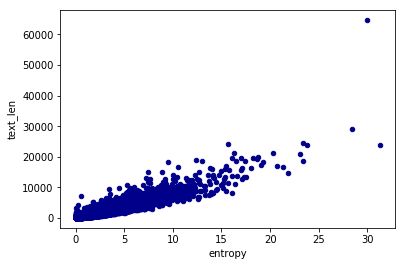

In [93]:
explore_text_mining_info_df.plot.scatter(x='entropy',y='text_len',c='DarkBlue')

In [94]:
import nltk

nltk.download('stopwords') 
nltk.download('words') 

# to remove stopword 
from nltk.corpus import stopwords 
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [95]:
explore_text_mining_info_df['english_present']=explore_text_mining_info_df['mining_info2'].apply(lambda x: [item for item in x if item in words])
explore_text_mining_info_df['english_present_len']=explore_text_mining_info_df['english_present'].apply(lambda x: len(x))
explore_text_mining_info_df[explore_text_mining_info_df['english_present_len'] <= 1]
#explore_text_mining_info_df['english_present_len'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,score,entropy,text_len,bins,time_present,clock_present,english_present,english_present_len
111247,"Bright lights over Beaufort, NC.",Beaufort,NC,2017-07-13T21:05:00,unknown,35 minutes,Occurred : 7/13/2017 21:05 (Entered as : 07/1...,http://www.nuforc.org/webreports/135/S135269.html,"Bright lights over Beaufort, NC.",2017-07-23T00:00:00,34.848100,-76.611500,"bright lights over beaufort, nc.",bright lights over beaufort nc,"[bright, lights, over, beaufort, nc, ]","[bright, lights, over, beaufort, nc, ]","[bright, lights, beaufort, nc, ]","[bright, lights, beaufort]","[0.007511636075475362, 0.013488852364198107]",0.136801,32,"(0.0, 1.0]",False,False,[bright],1
111263,More lights have appeared and are in formation...,New York,NY,2017-01-26T18:00:00,light,hours,Occurred : 1/26/2017 18:00 (Entered as : 1/26...,http://www.nuforc.org/webreports/132/S132311.html,More lights have appeared and are in formation...,2017-01-26T00:00:00,40.744307,-73.987724,more lights have appeared and are in formation...,more lights have appeared and are in formation...,"[more, lights, have, appeared, and, are, in, f...","[more, lights, have, appeared, and, are, in, f...","[lights, appeared, formation, brooklyn, ]","[lights, appeared, formation, brooklyn]","[0.013488852364198107, 0.0045003133206030785, ...",0.134981,61,"(0.0, 1.0]",False,False,[formation],1
111726,Cabo San Lucas Christmas lights.,Cabo San Lucas (Baja California)(Mexico),NaN,2014-12-25T00:00:00,teardrop,25 minutes,NaN,http://www.nuforc.org/webreports/116/S116322.html,NaN,2015-01-07T00:00:00,NaN,NaN,cabo san lucas christmas lights.,cabo san lucas christmas lights,"[cabo, san, lucas, christmas, lights, ]","[cabo, san, lucas, christmas, lights, ]","[cabo, san, lucas, christmas, lights, ]","[cabo, san, lucas, christmas, lights]","[9.297377162559352e-05, 0.013488852364198107]",0.085039,3,"(0.0, 1.0]",False,False,[san],1
111738,it was just threefashhes of ight in the sky,Dublin (Republic of Ireland),NaN,2001-10-12T12:34:00,light,12:34,Occurred : 10/12/2001 12:34 (Entered as : 12/...,http://www.nuforc.org/webreports/020/S20070.html,it was just threefashhes of ight in the sky,2001-11-20T00:00:00,NaN,NaN,it was just threefashhes of ight in the sky,it was just threefashhes of ight in the sky,"[it, was, just, threefashhes, of, ight, in, th...","[it, was, just, threefashhes, of, ight, in, th...","[threefashhes, ight, sky]","[threefashhes, ight, sky]",[0.013402627501238726],0.083382,43,"(0.0, 1.0]",False,False,[sky],1
111982,"UFO over highway in Orlando, Florida, April 1s...",Orlando,FL,2012-04-01T12:00:00,disk,60 seconds,Occurred : 4/1/2012 12:00 (Entered as : 4/01/...,http://www.nuforc.org/webreports/088/S88268.html,"UFO over highway in Orlando, Florida, April 1s...",2012-04-18T00:00:00,28.519247,-81.354096,"ufo over highway in orlando, florida, april st !",ufo over highway in orlando florida april st,"[ufo, over, highway, in, orlando, florida, apr...","[ufo, over, highway, in, orlando, florida, apr...","[ufo, highway, orlando, florida, april, st, ]","[ufo, highway, orlando, florida, april]","[0.003494625199357222, 0.0006638105688111173, ...",0.039980,53,"(0.0, 1.0]",False,False,[highway],1
112016,ufo at sunset,Seattle,WA,2004-05-12T19:15:00,light,15-20 sec,NaN,http://www.nuforc.org/webreports/036/S36880.html,NaN,2004-06-04T00:00:00,47.609046,-122.326028,ufo at sunset,ufo at sunset,"[ufo, at, sunset]","[ufo, at, sunset]","[ufo, sunset]","[ufo, sunset]","[0.003494625199357222, 0.0001678161468344949]",0.030623,3,"(0.0, 1.0]",False,False,[sunset],1
112049,de color verde paso sobre nosotros y se perdio...,Girardot,BC,1994-07-15T00:00:00,sphere,NaN,Occurred : 7/15/1994 00:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/045/S45689.html,de color verde pas

In [96]:
search_list = ['abduction']

ufo_item_ref=pd.DataFrame(explore_text_mining_info_df[~explore_text_mining_info_df['text'].isnull()])
ufo_item_ref['text_array']=ufo_item_ref["text"].str.split(".", n=0, expand=False)
ufo_item_ref['item_sentences']=ufo_item_ref['text_array'].apply(lambda x: [item for item in x if all(y in str(item).split(' ') for y in search_list)])
ufo_item_ref['num_of_item_sentences']=ufo_item_ref['item_sentences'].apply(lambda x: len(x))
ufo_item_ref.sort_values(by="num_of_item_sentences", ascending=False, inplace=True)
ufo_item_ref.reset_index(drop=False, inplace=True)

abduction_mention_cases=ufo_item_ref[ufo_item_ref['num_of_item_sentences'] > 0] #abduction cases
abduction_mention_cases.sort_values(by="entropy", ascending=False, inplace=True)
abduction_mention_cases.reset_index(drop=True, inplace=True)
abduction_mention_cases.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,score,entropy,text_len,bins,time_present,clock_present,english_present,english_present_len,text_array,item_sentences,num_of_item_sentences
0,5,Saw 3 objects in sky and a creature.,Charlotte,NC,2014-05-05T20:35:00,changing,4 hours,Occurred : 5/5/2014 20:35 (Entered as : 05/05...,http://www.nuforc.org/webreports/109/S109660.html,Saw 3 objects in sky and a creature. UFO sight...,2014-06-04T00:00:00,35.205801,-80.826392,saw objects in sky and a creature. ufo sighti...,saw objects in sky and a creature ufo sighting...,"[saw, objects, in, sky, and, a, creature, ufo,...","[saw, objects, in, sky, and, a, creature, ufo,...","[saw, objects, sky, creature, ufo, sighting, c...","[saw, objects, sky, creature, ufo, sighting, c...","[0.010542802636425914, 0.0033036411571013983, ...",23.423143,18618,"(23.0, 24.0]",True,True,"[saw, sky, creature, sighting, chase, possible...",1269,"[Saw 3 objects in sky and a creature, UFO sig...","[ UFO sighting, chase and possible abduction]",1
1,9,Life changing mind blowing unreal to much for ...,Triplet,NC,2009-04-16T20:30:00,unknown,15 days plus,Occurred : 4/16/2009 20:30 (Entered as : 4/16...,http://www.nuforc.org/webreports/070/S70358.html,Life changing mind blowing unreal to much for ...,2009-06-09T00:00:00,NaN,NaN,life changing mind blowing unreal to much for ...,life changing mind blowing unreal to much for ...,"[life, changing, mind, blowing, unreal, to, mu...","[life, changing, mind, blowing, unreal, to, mu...","[life, changing, mind, blowing, unreal, much, ...","[life, changing, mind, blowing, unreal, much, ...","[0.0004856192340270708, 0.0005184572075373021,...",20.700918,17040,"(20.0, 21.0]",True,True,"[life, mind, blowing, unreal, much, person, ob...",1178,[Life changing mind blowing unreal to much for...,[1 mor e thing I had a dream and all I really ...,1
2,22,OHIO/MUFON FOLLOW-UP REPORT: More information...,Morehead,KY,2003-11-23T22:00:00,NaN,NaN,Occurred : 11/23/2003 22:00 (Entered as : 11/...,http://www.nuforc.org/webreports/033/S33583.html,OHIO/MUFON FOLLOW-UP REPORT: More information...,2003-12-09T00:00:00,38.207500,-83.398900,ohio/mufon follow-up report: more information...,ohio mufon follow up report more information r...,"[ohio, mufon, follow, up, report, more, inform...","[ohio, mufon, follow, up, report, more, inform...","[ohio, mufon, follow, report, information, reg...","[ohio, mufon, follow, report, information, reg...","[0.0001461592011145571, 0.00034056806269353376...",17.038042,19648,"(17.0, 18.0]",True,False,"[follow, report, information, regarding, pecul...",1245,[OHIO/MUFON FOLLOW-UP REPORT: More informatio...,"[ Clearly, there was a problem taking place an...",1
3,27,MICHIGAN/MUFON FOLLOW-UP REPORT:,Fraser,MI,2003-09-20T18:00:00,NaN,25-30 minutes,Occurred : 9/20/2003 18:00 Reported: 12/4/2003...,http://www.nuforc.org/webreports/033/S33615.html,((NUFORC Note: We express our gratitude to To...,2003-12-09T00:00:00,42.538700,-82.949400,((nuforc note: we express our gratitude to to...,nuforc note we express our gratitude to todd ...,"[, nuforc, note, we, express, our, gratitude, ...","[, nuforc, note, we, express, our, gratitude, ...","[, nuforc, note, express, gratitude, todd, lem...","[nuforc, note, express, gratitude, todd, lemir...","[0.004299759930238445, 6.597813696074079e-05, ...",16.258173,21357,"(16.0, 17.0]",True,True,"[note, express, gratitude, state, director, mi...",1280,[((NUFORC Note: We express our gratitude to T...,"[ David then sent another report to me, via e...",7
4,32,"abducted as a child in Tampa, FL, in the 1960s",Tampa,FL,NaN,unknown,unknown,Occurred : 6/30/1965 02:00 (Entered as : 1960...,http://www.nuforc.org/webreports/074/S74742.html,"abducted as a child in Tampa, FL, in the 1960s...",NaN,28.006814,-82

In [97]:
search_list = ['hoax']

ufo_item_ref=pd.DataFrame(explore_text_mining_info_df[~explore_text_mining_info_df['text'].isnull()])
ufo_item_ref['text_array']=ufo_item_ref["text"].str.split(".", n=0, expand=False)
ufo_item_ref['item_sentences']=ufo_item_ref['text_array'].apply(lambda x: [item for item in x if all(y in str(item).split(' ') for y in search_list)])
ufo_item_ref['num_of_item_sentences']=ufo_item_ref['item_sentences'].apply(lambda x: len(x))
ufo_item_ref.sort_values(by="num_of_item_sentences", ascending=False, inplace=True)
ufo_item_ref.reset_index(drop=False, inplace=True)

hoax_mention_cases=ufo_item_ref[ufo_item_ref['num_of_item_sentences'] > 0] #hoax cases
hoax_mention_cases.sort_values(by="entropy", ascending=False, inplace=True)
hoax_mention_cases.reset_index(drop=True, inplace=True)
hoax_mention_cases.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,text_mining_info,text_mining_info_no_non_alpha,split_text_mining_info_no_non_alpha,text_mining_info_no_non_alpha_array,mining_info,mining_info2,score,entropy,text_len,bins,time_present,clock_present,english_present,english_present_len,text_array,item_sentences,num_of_item_sentences
0,30,Encounter described in details.,Momoishi (Japan),NaN,1999-09-20T02:00:00,triangle,unknowed,Occurred : 9/20/1999 02:00 (Entered as : 09/2...,http://www.nuforc.org/webreports/077/S77185.html,Encounter described in details What I’m abou...,2010-08-24T00:00:00,NaN,NaN,encounter described in details what i’m abou...,encounter described in details what i m about ...,"[encounter, described, in, details, what, i, m...","[encounter, described, in, details, what, i, m...","[encounter, described, details, m, describe, n...","[encounter, described, details, describe, next...","[0.00016167161804883813, 0.000291613292368465,...",16.036751,19473,"(16.0, 17.0]",True,True,"[encounter, describe, next, open, discussion, ...",1350,[Encounter described in details What I’m abo...,[ But now days I think to myself: those were ...,1
1,92,On 2/17/12 a Massive burning flash turned into...,Newburgh,NY,2012-02-17T23:00:00,triangle,5 minutes,Occurred : 2/17/2012 23:00 (Entered as : 02/1...,http://www.nuforc.org/webreports/087/S87567.html,On 2/17/12 a Massive burning flash turned into...,2012-03-13T00:00:00,41.530390,-74.048014,on // a massive burning flash turned into a tr...,on a massive burning flash turned into a trian...,"[on, a, massive, burning, flash, turned, into,...","[on, a, massive, burning, flash, turned, into,...","[massive, burning, flash, turned, triangular, ...","[massive, burning, flash, turned, triangular, ...","[0.00010969494832098737, 0.0001757738152618209...",11.699934,8432,"(11.0, 12.0]",True,False,"[massive, burning, flash, turned, triangular, ...",597,[On 2/17/12 a Massive burning flash turned int...,[ First I would like to start off by saying th...,2
2,121,In broad daylight almost cloudless afternoon a...,Austin,TX,1986-07-30T16:00:00,oval,3-4 minutes,Occurred : 7/30/1986 16:00 (Entered as : 07/3...,http://www.nuforc.org/webreports/082/S82901.html,In broad daylight almost cloudless afternoon a...,2011-08-07T00:00:00,30.308469,-97.760112,in broad daylight almost cloudless afternoon a...,in broad daylight almost cloudless afternoon a...,"[in, broad, daylight, almost, cloudless, after...","[in, broad, daylight, almost, cloudless, after...","[broad, daylight, almost, cloudless, afternoon...","[broad, daylight, almost, cloudless, afternoon...","[7.957668427325989e-05, 0.00023711837313829593...",10.987248,10013,"(10.0, 11.0]",True,False,"[broad, daylight, almost, cloudless, afternoon...",699,[In broad daylight almost cloudless afternoon ...,[ This is not a hoax],1
3,182,UFO AERIAL PHENOMENOM SIGHTING IN EARLY 90's; ...,Jeffersonville,IN,1991-06-25T14:00:00,circle,Few minutes,Occurred : 6/25/1991 14:00 (Entered as : 6/25...,http://www.nuforc.org/webreports/126/S126307.html,UFO AERIAL PHENOMENOM SIGHTING IN EARLY 90's; ...,2016-03-11T00:00:00,38.327847,-85.696071,ufo aerial phenomenom sighting in early 's; fa...,ufo aerial phenomenom sighting in early s fast...,"[ufo, aerial, phenomenom, sighting, in, early,...","[ufo, aerial, phenomenom, sighting, in, early,...","[ufo, aerial, phenomenom, sighting, early, fas...","[ufo, aerial, phenomenom, sighting, early, fas...","[0.003494625199357222, 4.482484114126665e-05, ...",9.694524,7649,"(9.0, 10.0]",True,False,"[aerial, sighting, early, fast, moving, disapp...",561,[UFO AERIAL PHENOMENOM SIGHTING IN EARLY 90's;...,[ Get a camera and record on film the details...,1
4,236,"Thought of as a Dream for 20 Years, Recent Inf...",Grants Pass,OR,1994-09-01T11:00:00,changing,12 hours,Occurred : 9/1/1994 11:00 (Entered as : 09/01...,http://www.nuforc.org/webreports/098/S98357.html,"Thought of as a Dream for 20 Years,